# ----------------------- NASA  Nearest Earth Objects (1910-2024) --------------------
# (Asteroid (4179) Tautatis is a potentially dangerous object passing at a distance of 2.3 times the distance from the Moon. (available in our dataset))

# There are many dangerous bodies in space, one of them is N.E.O. - "Nearest Earth Objects". Some such bodies really pose a danger to the planet Earth, NASA classifies them as "is_hazardous". This dataset contains ALL NASA observations of similar objects from 1910 to 2024!!!

# There are 338,199 records of N.E.O. in the Dataset!

# Try to predict "is_hazardous" as accurately as possible! (otherwise we will not be ready for an asteroid attack)

Text(0.5, 1.0, ' NASA  Nearest Earth Objects (1910-2024) ')

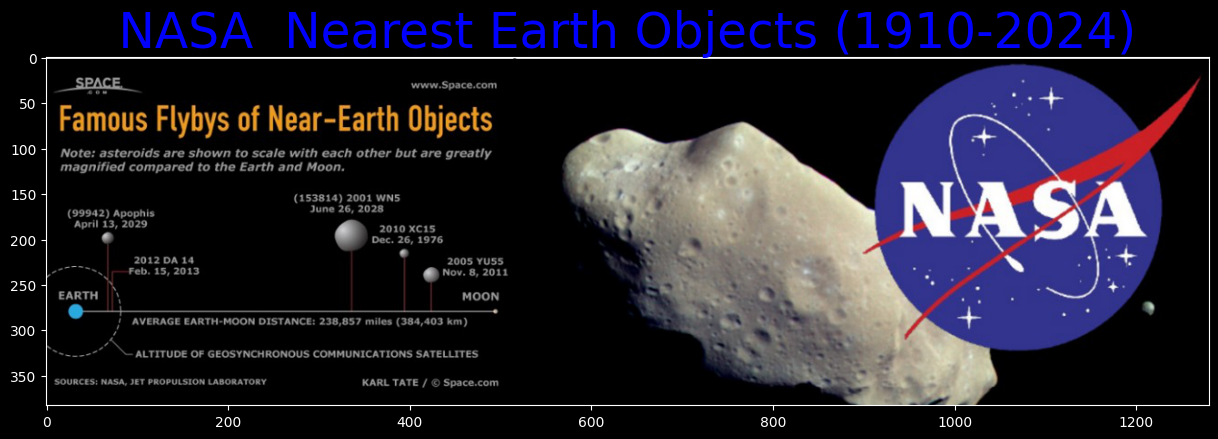

In [149]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
import matplotlib.image as mpimg
img = mpimg.imread('space.jpg')
plt.imshow(img)
plt.title (' NASA  Nearest Earth Objects (1910-2024) ',color = 'b',fontsize=35)

In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score , classification_report,confusion_matrix,f1_score
from collections import Counter
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier ,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier,NearestNeighbors
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import pyttsx3
import pickle
plt.style.use ("dark_background")

In [151]:
data = pd.read_csv("nearest-earth-objects(1910-2024).csv")
data

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [153]:
data.isna().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [154]:
data.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


<Axes: >

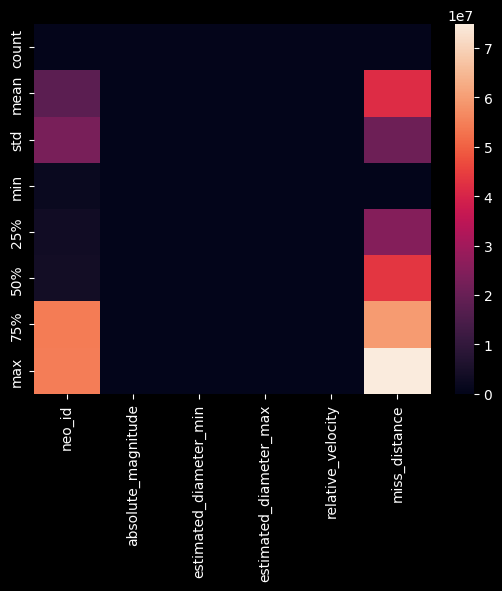

In [155]:
sns.heatmap(data.describe())

In [156]:
NEO_Name = pd.DataFrame(data['name'])
NEO_Name

,name
0,162117 (1998 SD15)
1,349507 (2008 QY)
2,455415 (2003 GA)
3,(2002 PB)
4,(2011 DW)
...,...
338194,(2023 VS4)
338195,(2023 XW5)
338196,(2024 KJ7)
338197,(2024 NE)


In [157]:
data = data.set_index('name').rename_axis(None)
#view updated DataFrame
data

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
162117 (1998 SD15),2162117,19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
349507 (2008 QY),2349507,18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
455415 (2003 GA),2455415,21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
(2002 PB),3132126,20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
(2011 DW),3557844,22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...
(2023 VS4),54403809,28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
(2023 XW5),54415298,28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
(2024 KJ7),54454871,21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
(2024 NE),54456245,23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


In [158]:
NEO_ID = pd.DataFrame(data['neo_id'])
NEO_ID

,neo_id
162117 (1998 SD15),2162117
349507 (2008 QY),2349507
455415 (2003 GA),2455415
(2002 PB),3132126
(2011 DW),3557844
...,...
(2023 VS4),54403809
(2023 XW5),54415298
(2024 KJ7),54454871
(2024 NE),54456245


In [159]:
data = data.drop(['neo_id','orbiting_body'],axis = 1)
data

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
162117 (1998 SD15),19.140,0.394962,0.883161,71745.401048,5.814362e+07,False
349507 (2008 QY),18.500,0.530341,1.185878,109949.757148,5.580105e+07,True
455415 (2003 GA),21.450,0.136319,0.304818,24865.506798,6.720689e+07,False
(2002 PB),20.630,0.198863,0.444672,78890.076805,3.039644e+07,False
(2011 DW),22.700,0.076658,0.171412,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...
(2023 VS4),28.580,0.005112,0.011430,56646.985988,6.406548e+07,False
(2023 XW5),28.690,0.004859,0.010865,21130.768947,2.948883e+07,False
(2024 KJ7),21.919,0.109839,0.245607,11832.041031,5.346078e+07,False
(2024 NE),23.887,0.044377,0.099229,56198.382733,5.184742e+06,False


In [160]:
data.corr()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
absolute_magnitude,1.000000,-0.594646,-0.594646,-0.345570,-0.213523,-0.343996
estimated_diameter_min,-0.594646,1.000000,1.000000,0.222434,0.111475,0.164841
estimated_diameter_max,-0.594646,1.000000,1.000000,0.222434,0.111475,0.164841
relative_velocity,-0.345570,0.222434,0.222434,1.000000,0.322587,0.187021
miss_distance,-0.213523,0.111475,0.111475,0.322587,1.000000,-0.006540
is_hazardous,-0.343996,0.164841,0.164841,0.187021,-0.006540,1.000000


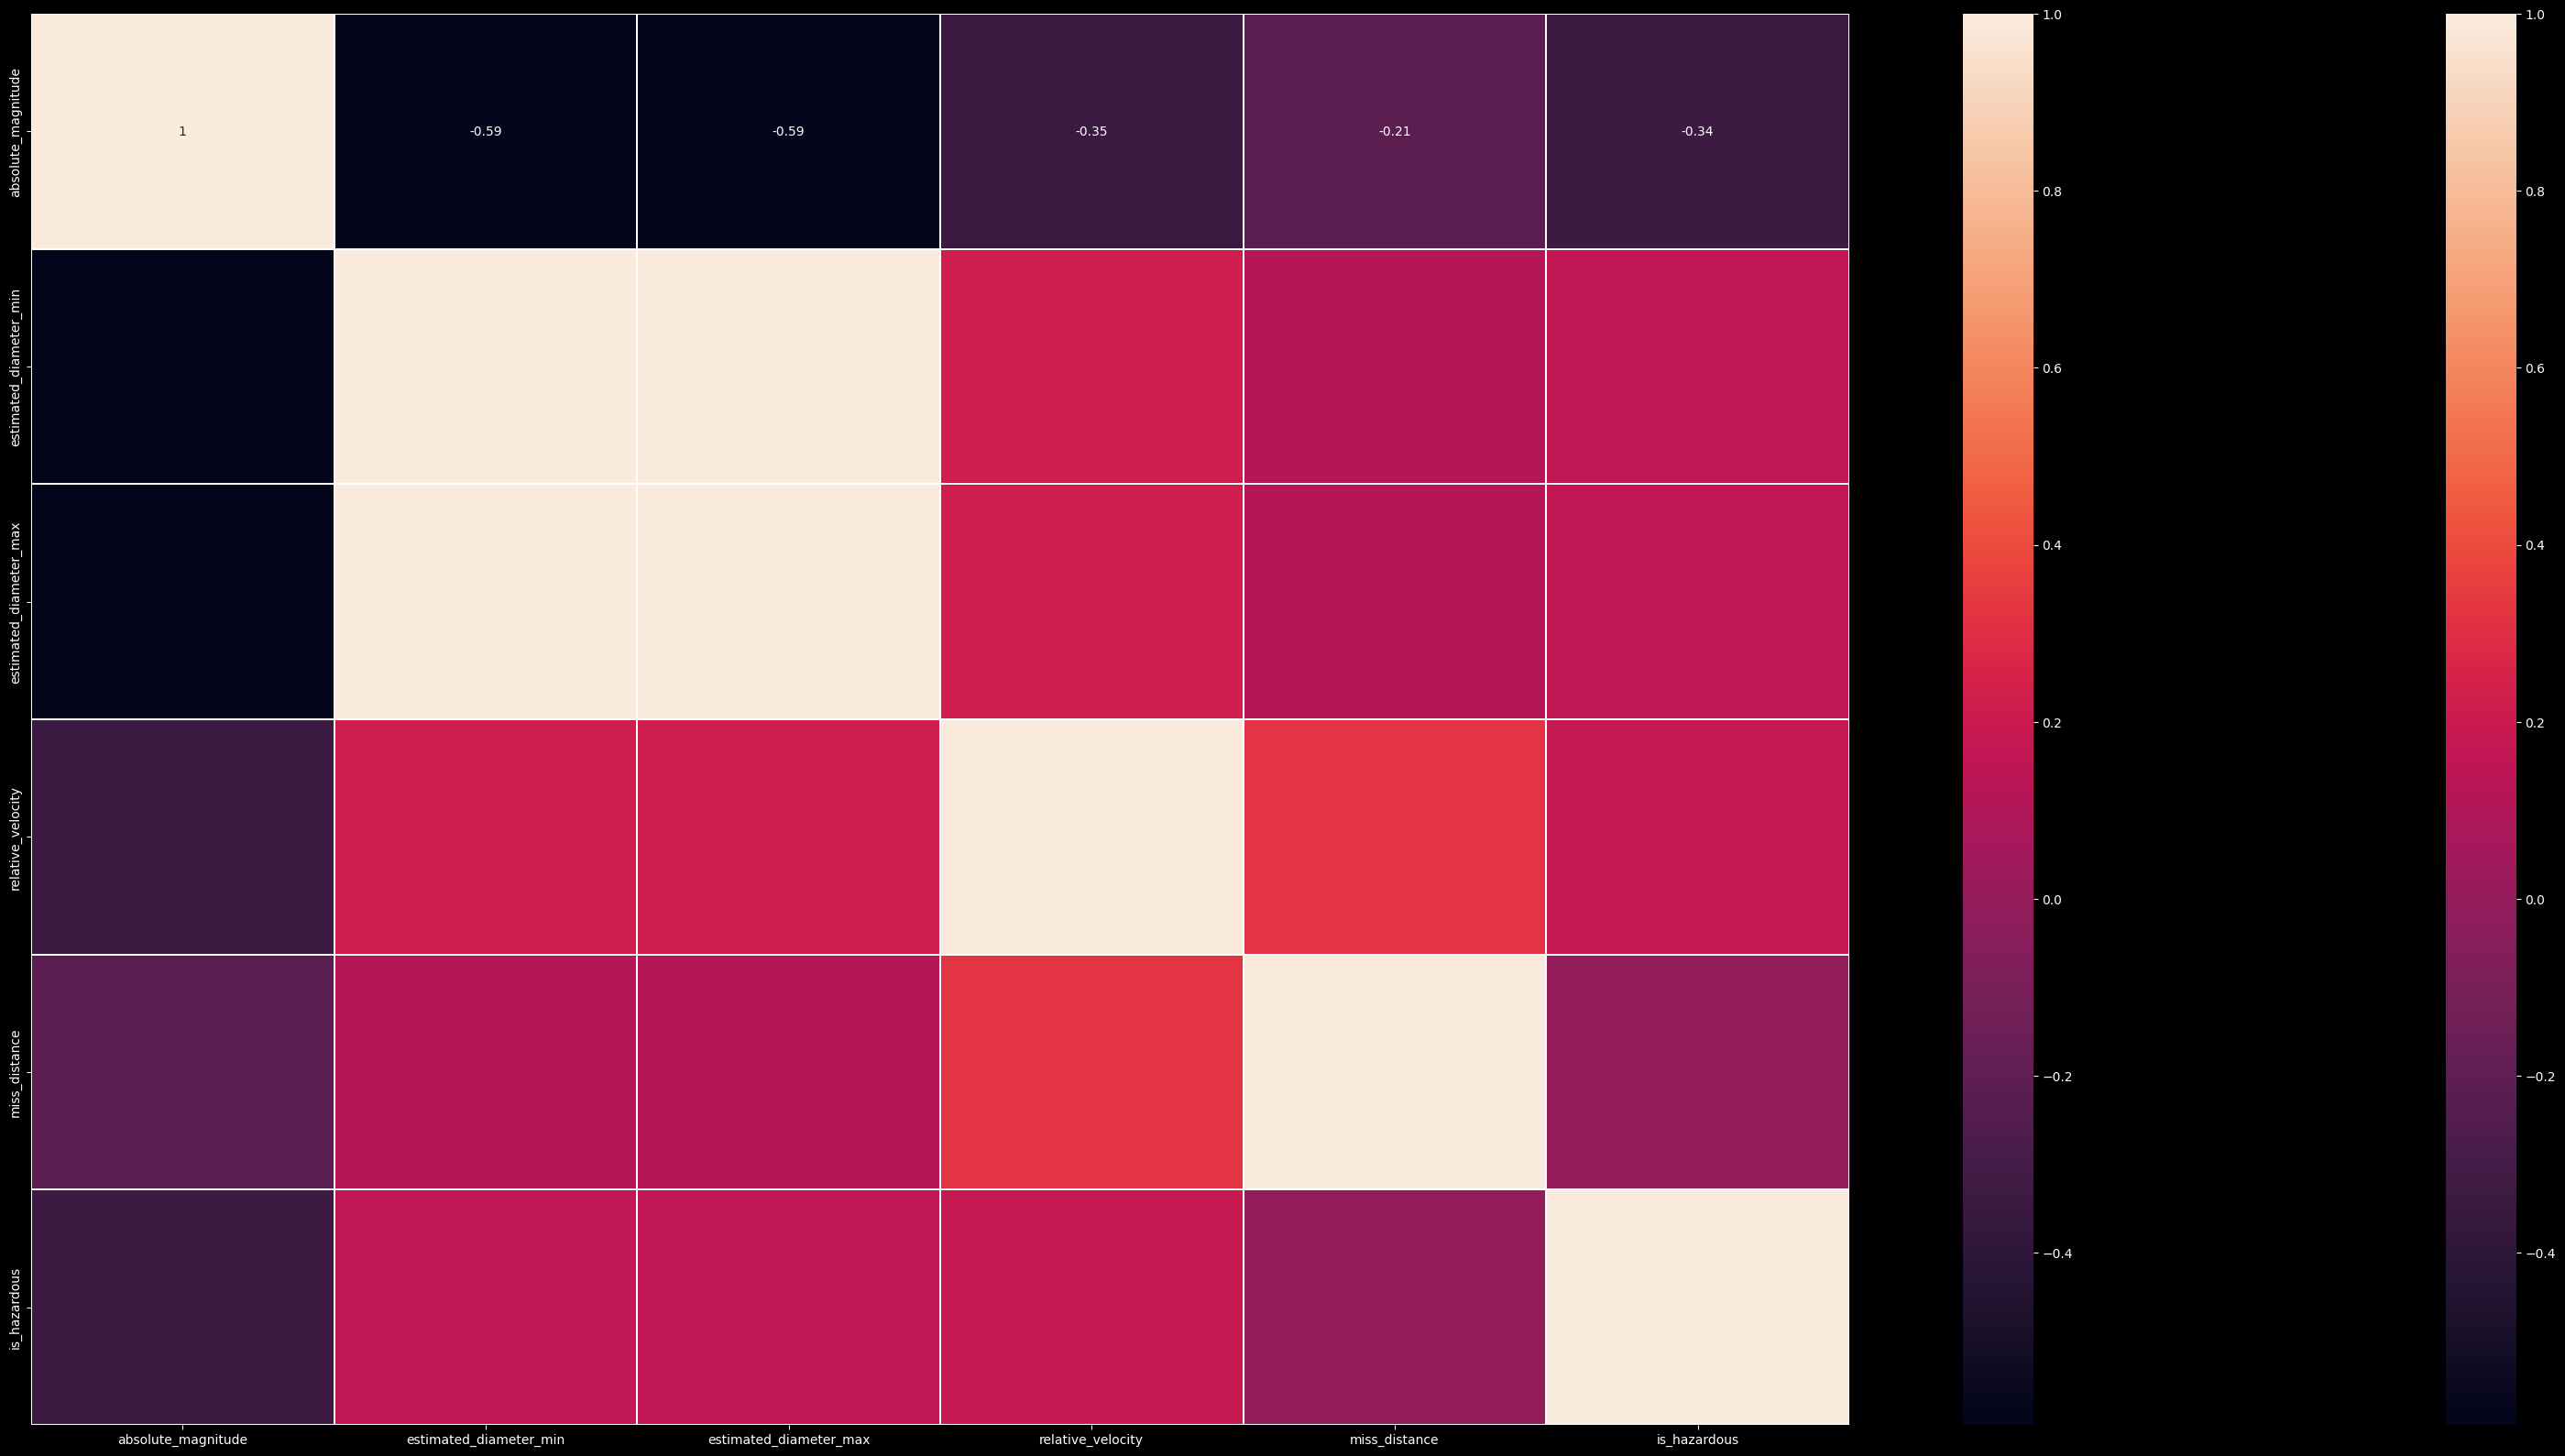

In [161]:
plt.figure(figsize=(40, 20))
sns.heatmap(data.corr())
top_corr_features = data.corr().index
g=sns.heatmap(data[top_corr_features].corr(),annot=True,linewidth=.10,cmap="rocket")

C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

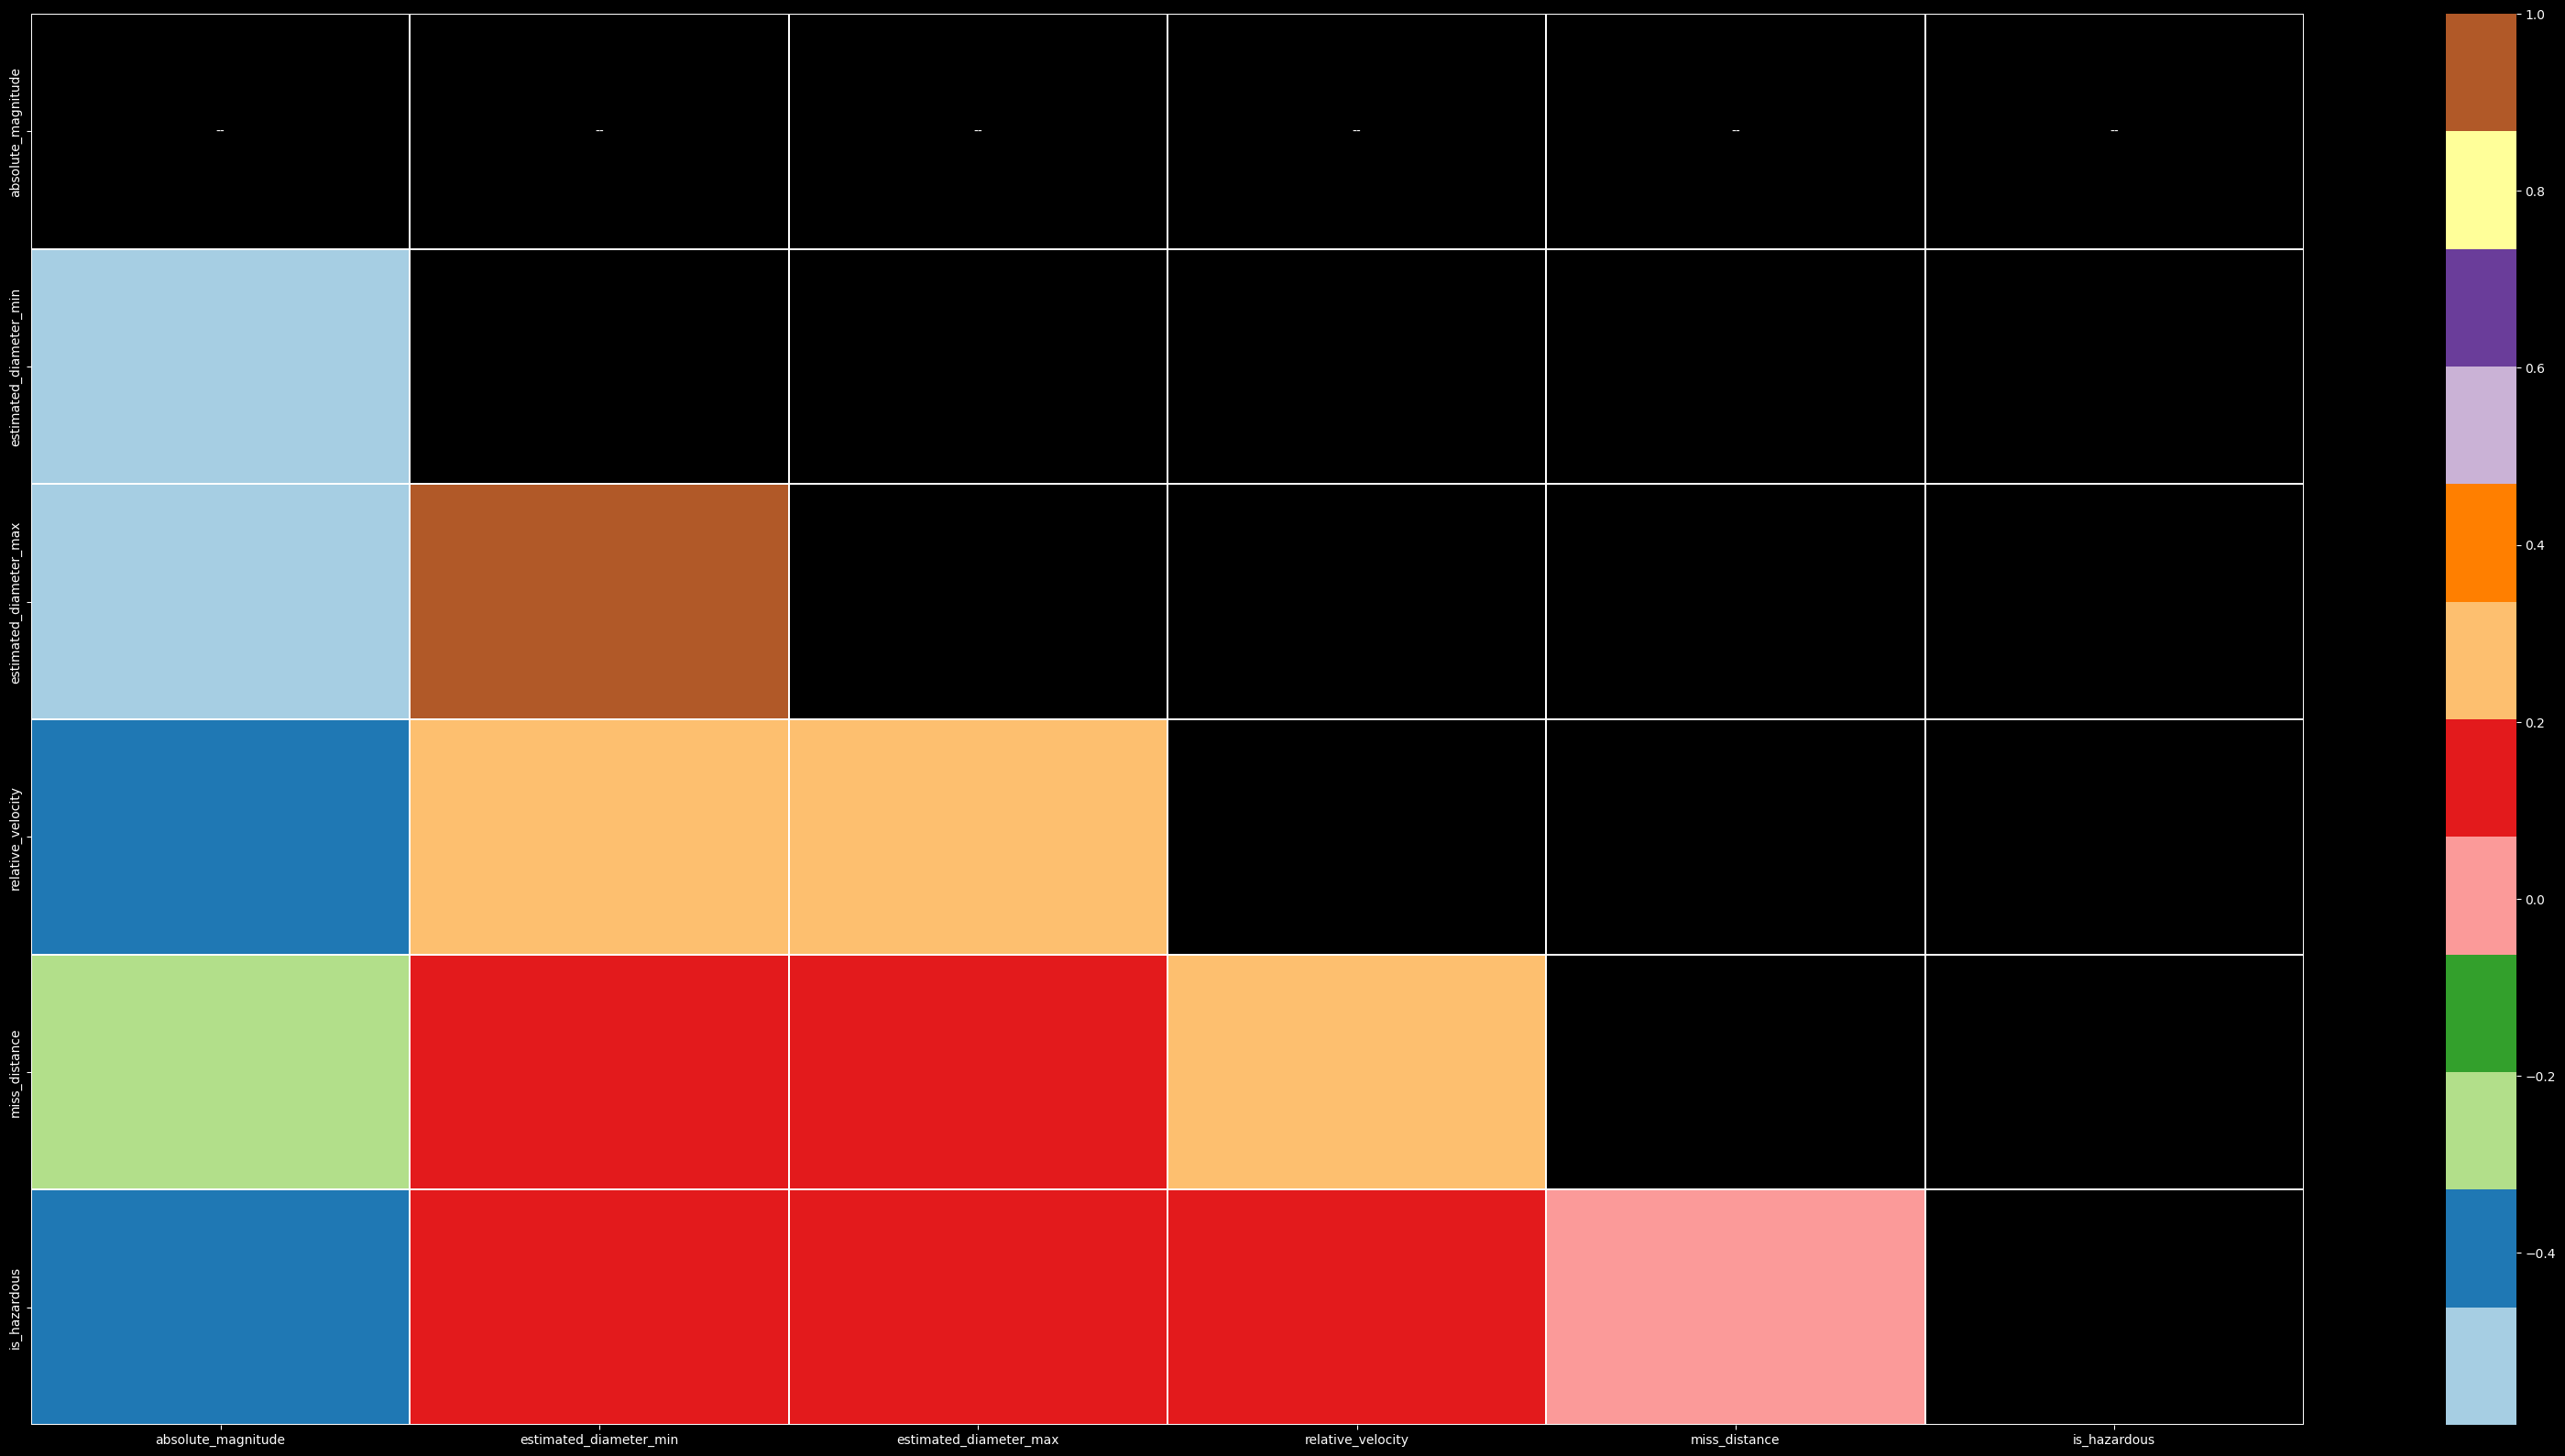

In [162]:
plt.figure(figsize=(40, 20))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, linewidth=.10, mask=matrix, cmap="Paired")

<Axes: ylabel='Count'>

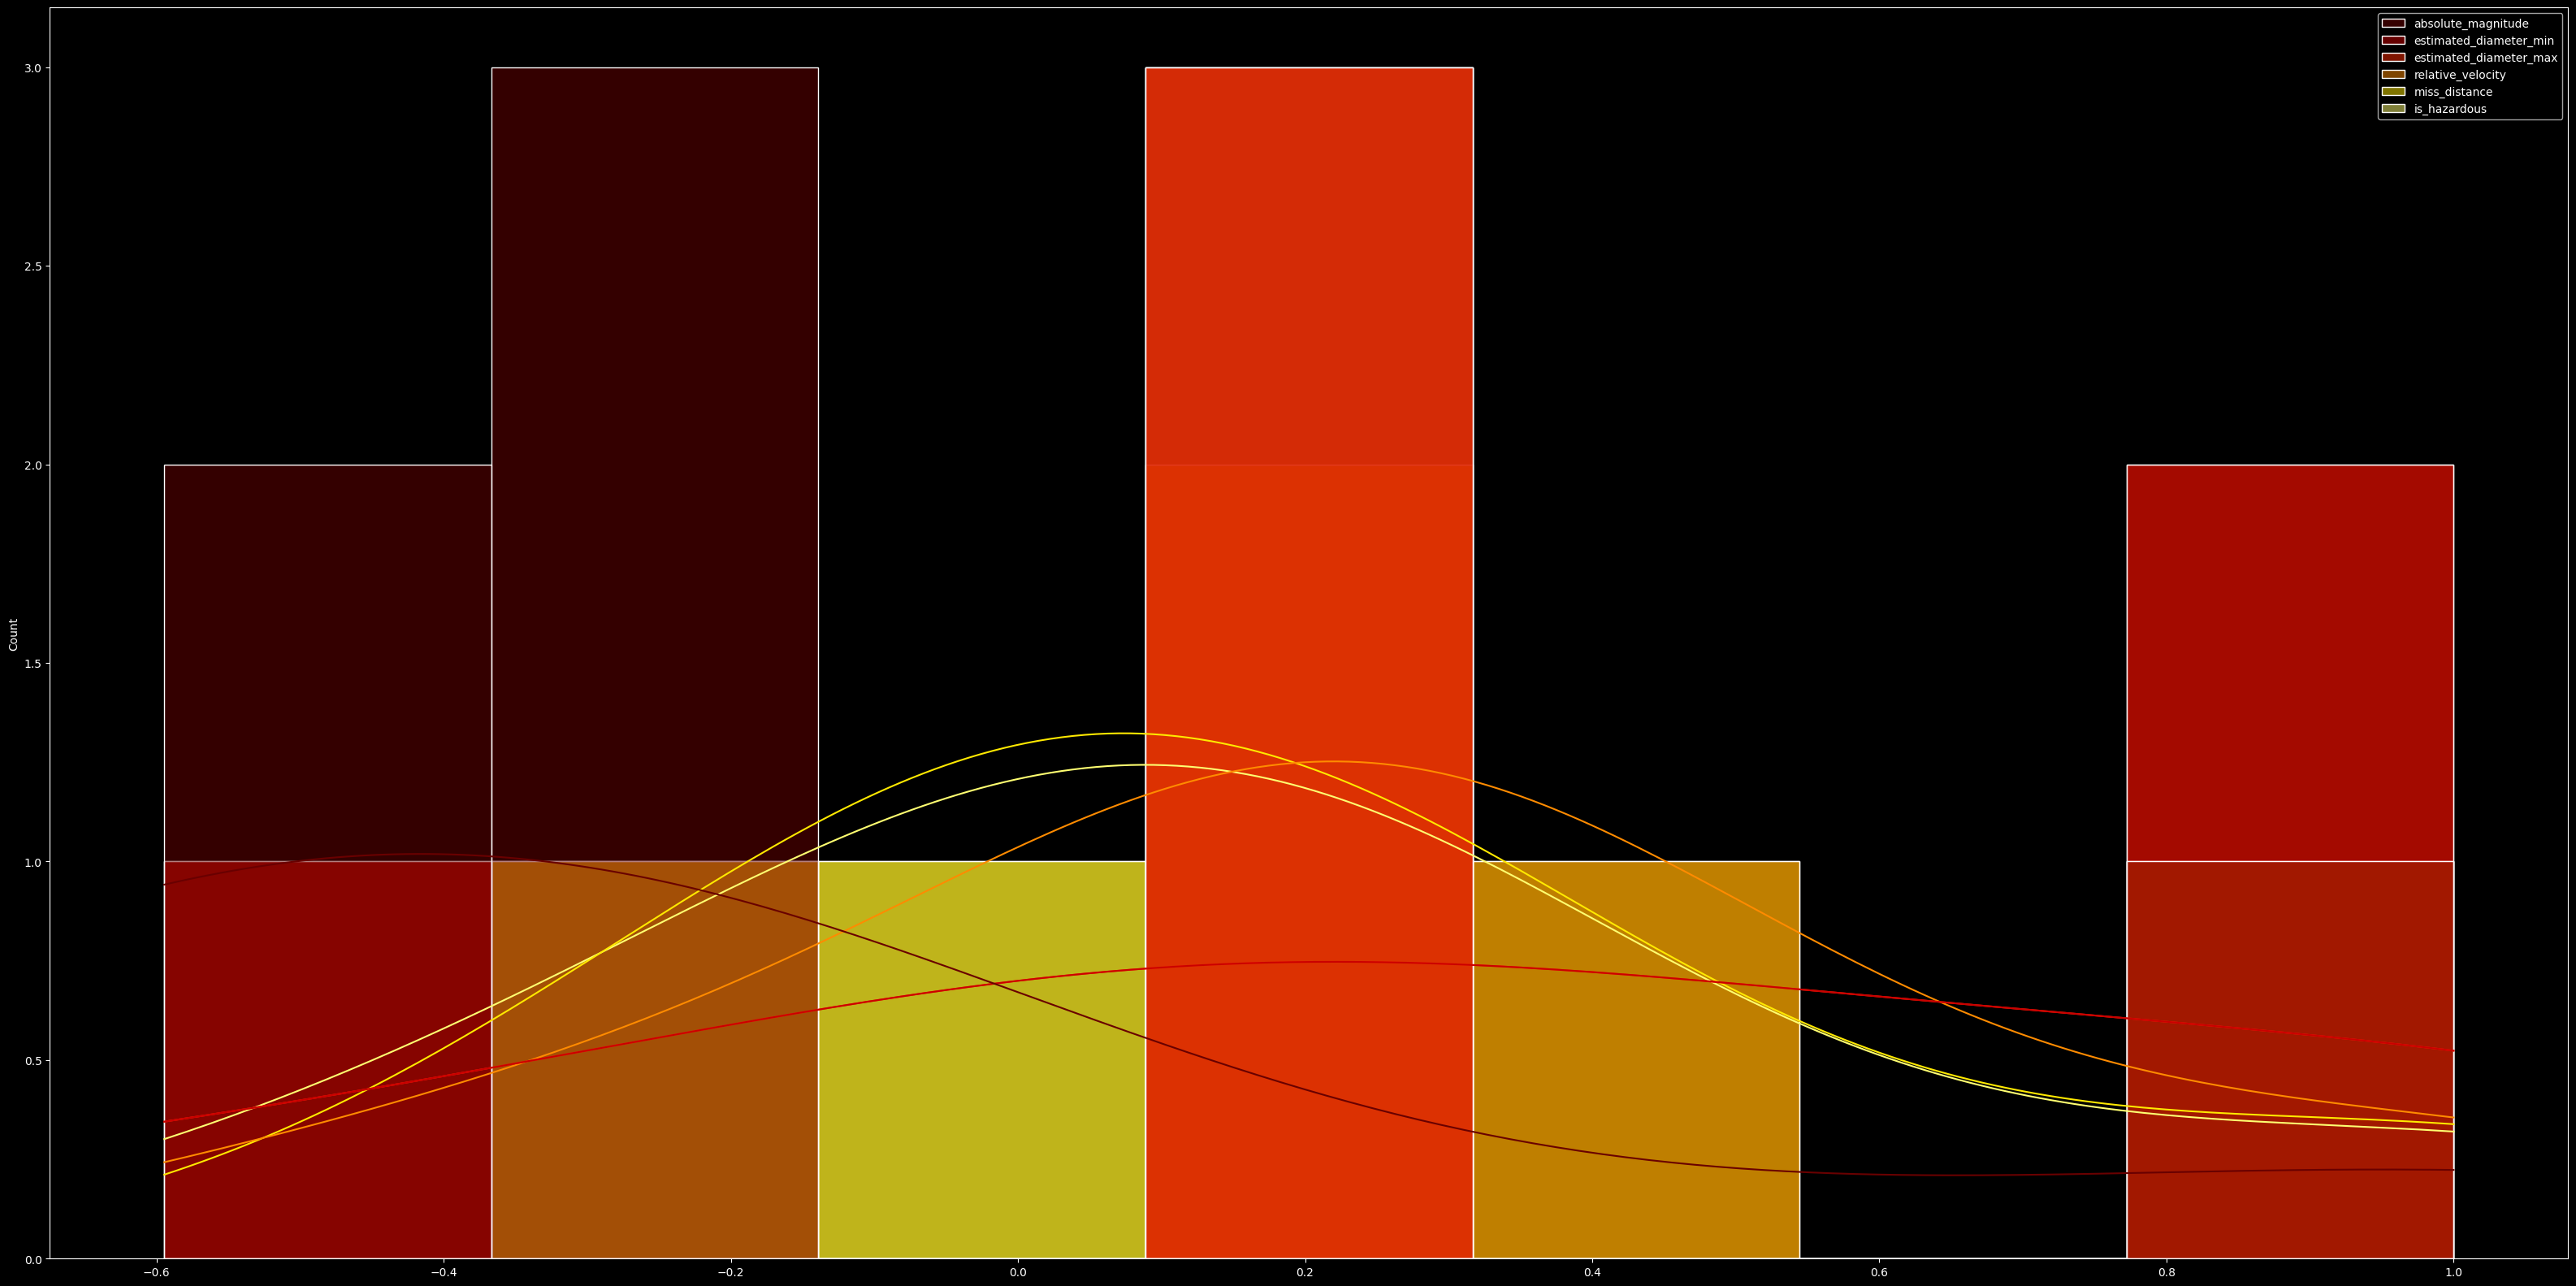

In [163]:
plt.figure(figsize=(40, 20))
sns.histplot(data=data.corr(),kde=True,palette='hot')

C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


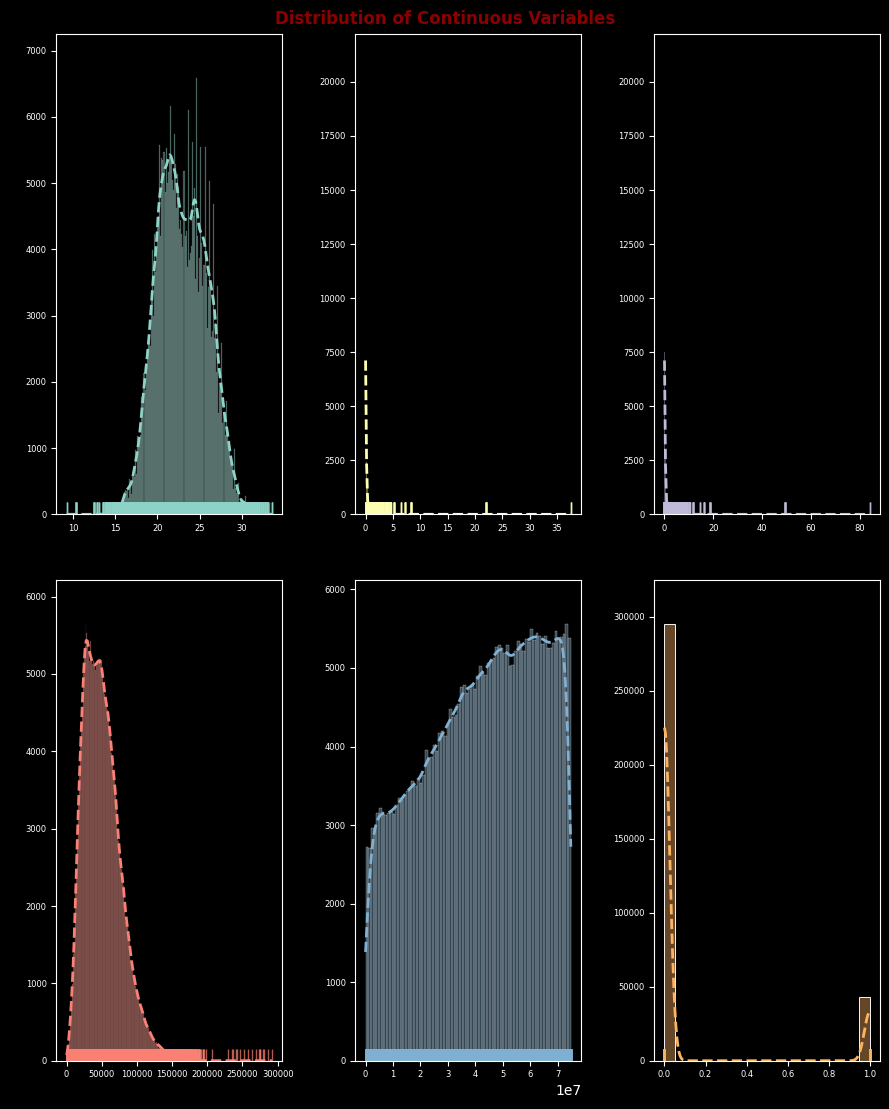

In [164]:
# إنشاء Subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 12))
axes = axes.flat

# الحصول على الألوان من color_cycle
color_cycle = list(plt.rcParams['axes.prop_cycle'])
num_colors = len(color_cycle)

# حلقة لرسم الرسوم البيانية
for i, num_col in enumerate(data.columns):  # استخدم data.columns للحصول على أسماء الأعمدة
    sns.histplot(data[num_col],  # استخدم العمود المناسب هنا
                 stat='count',
                 kde=True,
                 color=color_cycle[i % num_colors]["color"],
                 line_kws={'linewidth': 2, 'linestyle': 'dashed'},
                 alpha=0.4,
                 ax=axes[i])
    
    sns.rugplot(data[num_col],  # استخدم العمود المناسب هنا
                color=color_cycle[i % num_colors]["color"],
                ax=axes[i], alpha=0.7)
    
    axes[i].set_xlabel(" ")
    axes[i].set_ylabel("Count", fontsize=7, fontweight='bold', color='black')
    axes[i].set_title(num_col, fontsize=8, fontweight='bold', color='black')
    axes[i].tick_params(labelsize=6)

# إعدادات الشكل النهائي
fig.suptitle('Distribution of Continuous Variables', fontsize=12, fontweight='bold', color='darkred', y=0.92)
fig.tight_layout()
fig.subplots_adjust(top=0.9)

# عرض الشكل
plt.show()


In [165]:
data.nunique()

absolute_magnitude          1778
estimated_diameter_min      1778
estimated_diameter_max      1778
relative_velocity         338189
miss_distance             337826
is_hazardous                   2
dtype: int64

# Data Encoding

In [166]:
'''LE = LabelEncoder()
data['is_hazardous'] = LE.fit_transform(data['is_hazardous'])
data'''

"LE = LabelEncoder()\ndata['is_hazardous'] = LE.fit_transform(data['is_hazardous'])\ndata"

In [167]:
is_hazardous = []
for i in data['is_hazardous']:
    if i == False :
        is_hazardous.append(0)
    elif i == True :
        is_hazardous.append(1)
print(is_hazardous)

[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 

In [168]:
is_hazardous = pd.DataFrame(is_hazardous)
is_hazardous.rename(columns={0: 'is_hazardous'}, inplace=True)
is_hazardous = is_hazardous.set_index(NEO_Name['name'].values).rename_axis(None)
is_hazardous

,is_hazardous
162117 (1998 SD15),0
349507 (2008 QY),1
455415 (2003 GA),0
(2002 PB),0
(2011 DW),0
...,...
(2023 VS4),0
(2023 XW5),0
(2024 KJ7),0
(2024 NE),0


In [169]:
x = data.drop('is_hazardous' , axis = 1)
x

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
162117 (1998 SD15),19.140,0.394962,0.883161,71745.401048,5.814362e+07
349507 (2008 QY),18.500,0.530341,1.185878,109949.757148,5.580105e+07
455415 (2003 GA),21.450,0.136319,0.304818,24865.506798,6.720689e+07
(2002 PB),20.630,0.198863,0.444672,78890.076805,3.039644e+07
(2011 DW),22.700,0.076658,0.171412,56036.519484,6.311863e+07
...,...,...,...,...,...
(2023 VS4),28.580,0.005112,0.011430,56646.985988,6.406548e+07
(2023 XW5),28.690,0.004859,0.010865,21130.768947,2.948883e+07
(2024 KJ7),21.919,0.109839,0.245607,11832.041031,5.346078e+07
(2024 NE),23.887,0.044377,0.099229,56198.382733,5.184742e+06


# Missing Values

In [170]:
x.isna().sum()

absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
relative_velocity          0
miss_distance              0
dtype: int64

In [171]:
x = np.array(x)
x

array([[1.91400000e+01, 3.94961694e-01, 8.83161196e-01, 7.17454010e+04,
        5.81436233e+07],
       [1.85000000e+01, 5.30340723e-01, 1.18587791e+00, 1.09949757e+05,
        5.58010478e+07],
       [2.14500000e+01, 1.36318556e-01, 3.04817558e-01, 2.48655068e+04,
        6.72068877e+07],
       ...,
       [2.19190000e+01, 1.09838597e-01, 2.45606569e-01, 1.18320410e+04,
        5.34607845e+07],
       [2.38870000e+01, 4.43766973e-02, 9.92293117e-02, 5.61983827e+04,
        5.18474239e+06],
       [2.29510000e+01, 6.82896641e-02, 1.52700331e-01, 4.20603578e+04,
        7.12668246e+06]])

In [172]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
x[:,0:3] = imp_mean.fit_transform(x[:,0:3]) # this just example to explain how to identify the colunms of missing cells..

In [173]:
x = pd.DataFrame(x , columns= ['absolute_magnitude','estimated_diameter_min','estimated_diameter_max','relative_velocity','miss_distance'])
x = x.set_index(NEO_Name['name'].values).rename_axis(None)
x

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
162117 (1998 SD15),19.140,0.394962,0.883161,71745.401048,5.814362e+07
349507 (2008 QY),18.500,0.530341,1.185878,109949.757148,5.580105e+07
455415 (2003 GA),21.450,0.136319,0.304818,24865.506798,6.720689e+07
(2002 PB),20.630,0.198863,0.444672,78890.076805,3.039644e+07
(2011 DW),22.700,0.076658,0.171412,56036.519484,6.311863e+07
...,...,...,...,...,...
(2023 VS4),28.580,0.005112,0.011430,56646.985988,6.406548e+07
(2023 XW5),28.690,0.004859,0.010865,21130.768947,2.948883e+07
(2024 KJ7),21.919,0.109839,0.245607,11832.041031,5.346078e+07
(2024 NE),23.887,0.044377,0.099229,56198.382733,5.184742e+06


In [174]:
#InputsData = x

In [175]:
x.isna().sum()

absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
relative_velocity         0
miss_distance             0
dtype: int64

## Steps to Handle Outliers

In [176]:
print(list(data.columns))

['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance', 'is_hazardous']


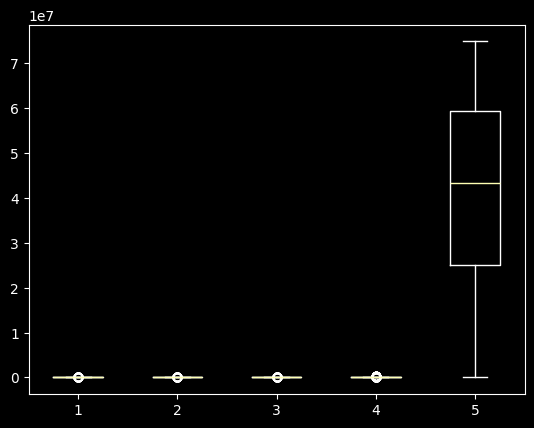

In [177]:
plt.boxplot(x)
plt.show()

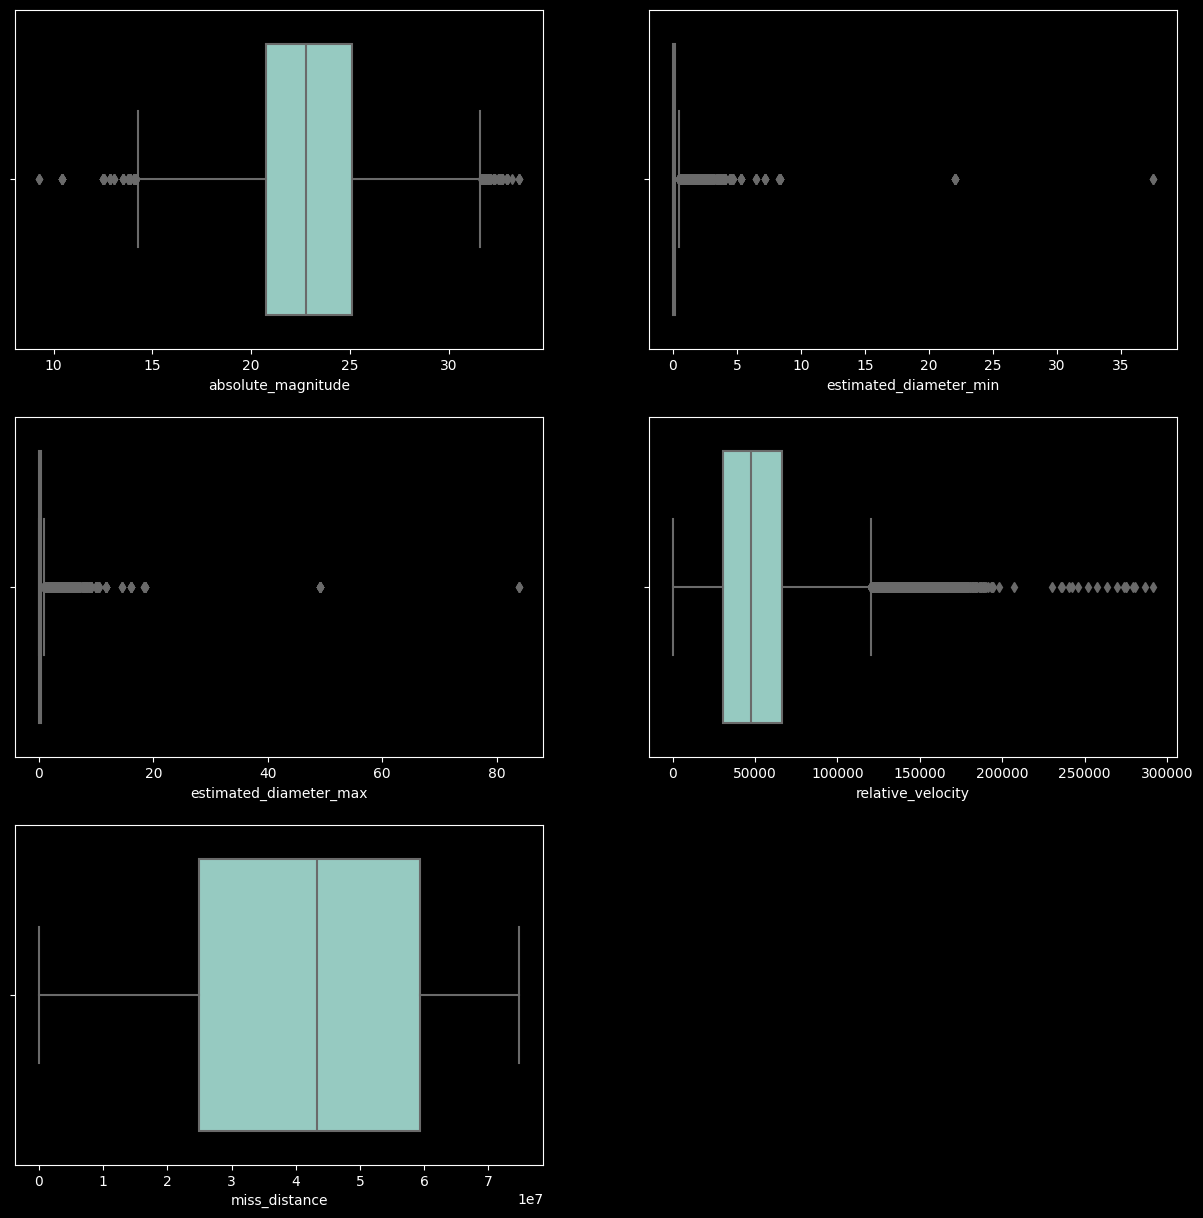

In [178]:
numerical_col = [i for i in data.columns if data[i].dtypes == 'float64']
plt.figure(figsize=(15, 15))
for i, col in enumerate(numerical_col):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=data[col])
plt.show()

In [179]:
print(data['absolute_magnitude'].head())  # عرض أول 5 قيم في العمود
print(data['absolute_magnitude'].dtype)   # تأكد من نوع البيانات

162117 (1998 SD15)    19.14
349507 (2008 QY)      18.50
455415 (2003 GA)      21.45
(2002 PB)             20.63
(2011 DW)             22.70
Name: absolute_magnitude, dtype: float64
float64


In [180]:
Q1 = x['absolute_magnitude'].quantile(0.25)
Q3 = x['absolute_magnitude'].quantile(0.75)
IQR = Q3 - Q1
# تحديد القيم الشاذة
outliers = x[(x['absolute_magnitude'] < (Q1 - 1.5 * IQR)) | (x['absolute_magnitude'] > (Q3 + 1.5 * IQR))]
print("Outliers:")
print(outliers)


Outliers:
                           absolute_magnitude  estimated_diameter_min  \
887 Alinda (A918 AA)                    13.88                4.451998   
(2019 UN13)                             32.00                0.001058   
(2019 UN13)                             32.00                0.001058   
2212 Hephaistos (1978 SB)               13.51                5.279040   
1036 Ganymed (A924 UB)                   9.25               37.545248   
...                                       ...                     ...   
(2020 CW)                               32.56                0.000818   
(2011 CQ1)                              32.10                0.001011   
(2023 RS)                               32.32                0.000913   
(2019 VB5)                              31.70                0.001215   
(2024 HA)                               31.77                0.001176   

                           estimated_diameter_max  relative_velocity  \
887 Alinda (A918 AA)                     

# Splitting Data to input(X) & output(Y)

In [181]:
x = x.iloc[:,:].values
x

array([[1.91400000e+01, 3.94961694e-01, 8.83161196e-01, 7.17454010e+04,
        5.81436233e+07],
       [1.85000000e+01, 5.30340723e-01, 1.18587791e+00, 1.09949757e+05,
        5.58010478e+07],
       [2.14500000e+01, 1.36318556e-01, 3.04817558e-01, 2.48655068e+04,
        6.72068877e+07],
       ...,
       [2.19190000e+01, 1.09838597e-01, 2.45606569e-01, 1.18320410e+04,
        5.34607845e+07],
       [2.38870000e+01, 4.43766973e-02, 9.92293117e-02, 5.61983827e+04,
        5.18474239e+06],
       [2.29510000e+01, 6.82896641e-02, 1.52700331e-01, 4.20603578e+04,
        7.12668246e+06]])

In [182]:
y = is_hazardous.iloc[:,:].values
y

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

C:\Users\Mahmoud Ragab\AppData\Local\Temp\ipykernel_2100\116496386.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data['is_hazardous'],kde=True,palette='hot')
C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\seaborn\_stats\counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


<Axes: xlabel='is_hazardous', ylabel='Count'>

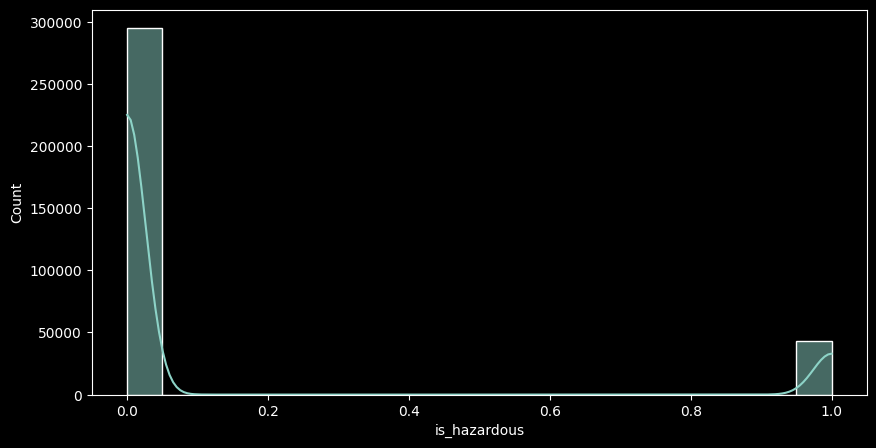

In [183]:
plt.figure(figsize=(10,5))
sns.histplot(data=data['is_hazardous'],kde=True,palette='hot')

In [184]:
df = data['is_hazardous'].values.sum()
print(" Dangerous objects  =",df ,"\n","but Objects that are not dangerous =",338199 -df)

 Dangerous objects  = 43162 
 but Objects that are not dangerous = 295037


# train test split (70%:30%)

In [185]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

# Data Normalization

In [186]:
scaler_mm = MinMaxScaler()
X_train_mm = scaler_mm.fit_transform(x_train)
X_test_mm = scaler_mm.fit_transform(x_test)

In [187]:
x_train

array([[2.42000000e+01, 3.84197891e-02, 8.59092601e-02, 4.46451749e+04,
        2.56894851e+07],
       [2.25900000e+01, 8.06408277e-02, 1.80318372e-01, 6.68920967e+04,
        4.81054243e+07],
       [1.99900000e+01, 2.67026877e-01, 5.97090249e-01, 2.47976489e+04,
        2.98984493e+07],
       ...,
       [2.24500000e+01, 8.60111940e-02, 1.92326877e-01, 4.10482768e+04,
        5.13069008e+07],
       [1.71400000e+01, 9.92098919e-01, 2.21840062e+00, 4.28768091e+04,
        5.21529035e+07],
       [2.61300000e+01, 1.57962856e-02, 3.53215683e-02, 3.40373549e+04,
        3.81749990e+07]])

In [188]:
X_train_mm

array([[6.14467735e-01, 1.00969229e-03, 1.00969229e-03, 1.52418444e-01,
        3.43389291e-01],
       [5.48294287e-01, 2.13424508e-03, 2.13424508e-03, 2.28716862e-01,
        6.43100055e-01],
       [4.41430333e-01, 7.09861733e-03, 7.09861733e-03, 8.43490341e-02,
        3.99664956e-01],
       ...,
       [5.42540074e-01, 2.27728421e-03, 2.27728421e-03, 1.40082462e-01,
        6.85905174e-01],
       [3.24290999e-01, 2.64108327e-02, 2.64108327e-02, 1.46353627e-01,
        6.97216595e-01],
       [6.93793670e-01, 4.07117724e-04, 4.07117724e-04, 1.16037686e-01,
        5.10325991e-01]])

In [214]:
InputsData_for_Testing = pd.DataFrame(X_test_mm , columns= ['absolute_magnitude','estimated_diameter_min','estimated_diameter_max','relative_velocity','miss_distance'])
InputsData_for_Testing

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
0,0.750103,0.000210,0.000210,0.113530,0.430642
1,0.659679,0.000603,0.000603,0.081977,0.478136
2,0.666256,0.000559,0.000559,0.085109,0.160261
3,0.453350,0.006209,0.006209,0.102453,0.636707
4,0.371147,0.015618,0.015618,0.285079,0.666496
...,...,...,...,...,...
101455,0.803535,0.000109,0.000109,0.055503,0.856474
101456,0.609947,0.001063,0.001063,0.100722,0.067542
101457,0.667900,0.000549,0.000549,0.188349,0.456800
101458,0.721332,0.000295,0.000295,0.290189,0.821909


# SMOTEENN

In [189]:
'''y_train_flat = np.ravel(y_train)
print('Original dataset shape %s' % Counter(y_train_flat))
#  SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_smoteenn_mm, y_smoteenn_mm = smoteenn.fit_resample(X_train_mm, y_train_flat)
y_smoteenn_mm_flat = np.ravel(y_smoteenn_mm)
print('Resampled dataset shape %s' % Counter(y_smoteenn_mm_flat))'''

"y_train_flat = np.ravel(y_train)\nprint('Original dataset shape %s' % Counter(y_train_flat))\n#  SMOTEENN\nsmoteenn = SMOTEENN(random_state=42)\nX_smoteenn_mm, y_smoteenn_mm = smoteenn.fit_resample(X_train_mm, y_train_flat)\ny_smoteenn_mm_flat = np.ravel(y_smoteenn_mm)\nprint('Resampled dataset shape %s' % Counter(y_smoteenn_mm_flat))"

# Confusion Matrix

In [190]:
import time
def get_metrics_results(y_true, y_pred, verbose = False):
    results = []
    start = time.time()
    for metric_func in [accuracy_score, roc_auc_score, precision_score, recall_score, f1_score]:
        current_res = metric_func(y_true, y_pred)
        results.append(current_res)
        if verbose: print(f"{metric_func.__name__}: {current_res}")
        start = time.time()
        
    return results
    end = time.time()
    print('Execution time is:')
    print(end - start)
    
def plot_confusion_matrix (Model_Prediction,title):
    cm = confusion_matrix(y_test, Model_Prediction)
    class_names = ['hazardous','not hazardous']
    plt.title(title)
    df_cm = pd.DataFrame(cm, index = [i for i in class_names], columns = [i for i in class_names])
    sns.heatmap(df_cm, annot = True)
    cmap = plt.cm.Blues
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)

## Applying Algo in data

# Logistic Regression

In [41]:
LR = LogisticRegression(random_state=0)
parameters = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}
lr_clf = RandomizedSearchCV(LR, parameters, scoring='f1', n_iter=250)
lr_clf.fit(X=X_train_mm, y=y_train)
lr_best = lr_clf.best_params_
print(lr_clf.best_params_)
y_pred1 = lr_clf.predict(X_test_mm)
y_pred1

C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

{'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 400, 'C': 0.1}


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
get_metrics_results(y_test, y_pred1, verbose = True)

accuracy_score: 0.8714665878178592
roc_auc_score: 0.5334961825423051
precision_score: 0.4902241297091082
recall_score: 0.07907692307692307
f1_score: 0.13618599721799032


[0.8714665878178592,
 0.5334961825423051,
 0.4902241297091082,
 0.07907692307692307,
 0.13618599721799032]

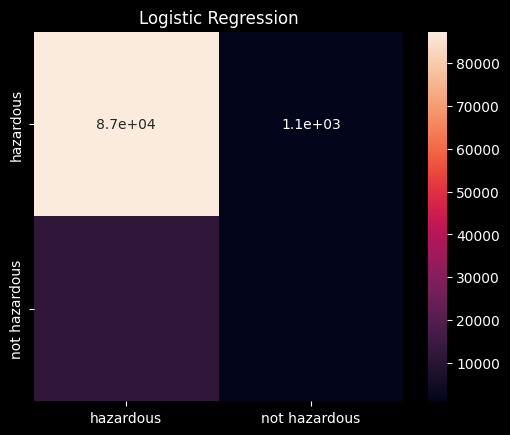

In [44]:
plot_confusion_matrix(y_pred1 , "Logistic Regression")

([<matplotlib.patches.Wedge at 0x14cd4f79b50>,
 [Text(-0.4368626645752139, -1.0095300947967052, 'Correct Result'),
  Text(0.436862664575214, 1.009530094796705, 'Wrong Result')],
 [Text(-0.23828872613193483, -0.550652778980021, '87%'),
  Text(0.23828872613193489, 0.5506527789800209, '13%')])

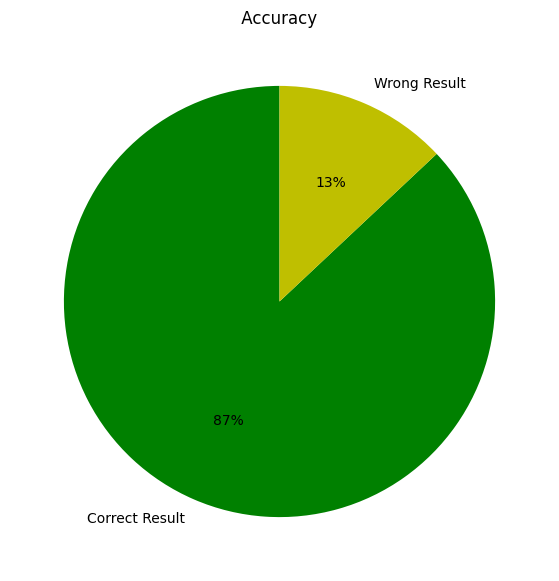

In [45]:
acc1 = np.round(accuracy_score(y_test, y_pred1)*100)
plt.style.use('default')
plt.figure(figsize=(12,7))
data = [acc1,100-acc1]
names = ['Correct Result','Wrong Result']
plt.title (' Accuracy ',color = 'black')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['g','y'],autopct = '%1.0f%%',)

# Random Forest Classifier

In [46]:
'''RFC = RandomForestClassifier(n_estimators = 250,max_features = 50)
parameters = {'n_estimators': [30, 35, 40, 45], 'max_depth': [4, 5, 6, 7, 8], 'min_impurity_decrease': [0, 0.001, 0.01],
             'criterion': ["gini", "entropy", "log_loss"], 'min_samples_split': [4, 5, 6, 7], 
            'max_features': ["sqrt", "log2", None]
             }
rf_clf=RandomizedSearchCV(RFC, parameters, scoring='accuracy', n_iter=1000)
rf_clf.fit(X_train_mm,y_train)
rf_best = rf_clf.best_params_
print(rf_clf.best_params_)'''

'RFC = RandomForestClassifier(n_estimators = 250,max_features = 50)\nparameters = {\'n_estimators\': [30, 35, 40, 45], \'max_depth\': [4, 5, 6, 7, 8], \'min_impurity_decrease\': [0, 0.001, 0.01],\n             \'criterion\': ["gini", "entropy", "log_loss"], \'min_samples_split\': [4, 5, 6, 7], \n            \'max_features\': ["sqrt", "log2", None]\n             }\nrf_clf=RandomizedSearchCV(RFC, parameters, scoring=\'accuracy\', n_iter=1000)\nrf_clf.fit(X_train_mm,y_train)\nrf_best = rf_clf.best_params_\nprint(rf_clf.best_params_)'

In [113]:
RFC = RandomForestClassifier(n_estimators = 150, random_state=42)
RFC.fit(X_train_mm,y_train)
y_pred3=RFC.predict(X_test_mm)
y_pred3

C:\Users\Mahmoud Ragab\AppData\Local\Temp\ipykernel_2100\722801139.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(X_train_mm,y_train)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [114]:
get_metrics_results(y_test, y_pred3, verbose = True)

accuracy_score: 0.906682436428149
roc_auc_score: 0.7479882258821892
precision_score: 0.6703317901234568
recall_score: 0.5346153846153846
f1_score: 0.594830537487162


[0.906682436428149,
 0.7479882258821892,
 0.6703317901234568,
 0.5346153846153846,
 0.594830537487162]

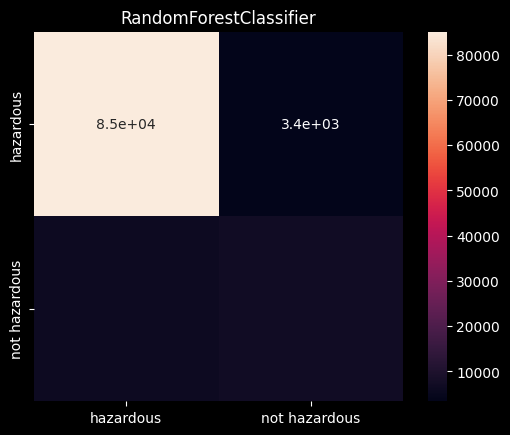

In [115]:
plot_confusion_matrix(y_pred3 , "RandomForestClassifier")

In [116]:
df_comp = pd.DataFrame({
    'Actual': y_test.ravel(),   # تحويل y_test إلى بعد واحد
    'Predict': y_pred3.ravel()  # تحويل y_pred2 إلى بعد واحد
})
df_comp

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
101455,0,0
101456,0,0
101457,0,0
101458,0,0


<Axes: title={'center': ' Actual & Predict '}>

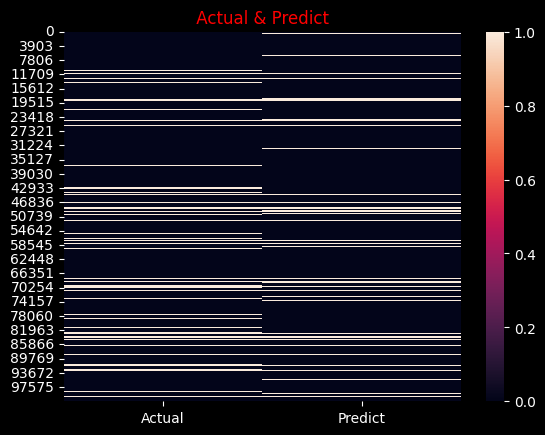

In [117]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(df_comp)

([<matplotlib.patches.Wedge at 0x2ae92545d50>,
 [Text(-0.306890129611062, -1.0563230795297933, 'Correct Result'),
  Text(0.3068900307109565, 1.056323108262916, 'Wrong Result')],
 [Text(-0.16739461615148835, -0.576176225198069, '91%'),
  Text(0.16739456220597623, 0.5761762408706814, '9%')])

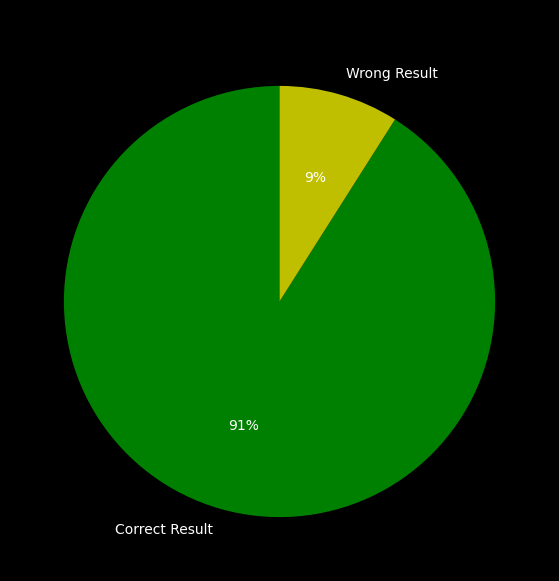

In [118]:
acc = np.round(accuracy_score(y_test, y_pred3)*100)
plt.figure(figsize=(12,7))
data = [acc,100-acc]
names = ['Correct Result','Wrong Result']
plt.title (' Accuracy ',color = 'black')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['g','y'],autopct = '%1.0f%%',)

# KNeighborsClassifier

In [53]:
knn=KNeighborsClassifier()
parameters = {'n_neighbors':[40, 45, 50], 'weights':['uniform', 'distance'], 'metric' : ['minkowski','euclidean','manhattan']}
knn_clf=RandomizedSearchCV(knn, parameters, scoring='f1', n_iter=100)
knn_clf.fit(X_train_mm,y_train)
knn_best = knn_clf.best_params_
print(knn_clf.best_params_)

C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

{'weights': 'distance', 'n_neighbors': 40, 'metric': 'manhattan'}


In [67]:
y_pred4 = knn_clf.predict(X_test_mm)
y_pred4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
get_metrics_results(y_test, y_pred4, verbose = True)

accuracy_score: 0.8846737630593338
roc_auc_score: 0.5988145359049722
precision_score: 0.651858779518354
recall_score: 0.21446153846153845
f1_score: 0.3227412166464085


[0.8846737630593338,
 0.5988145359049722,
 0.651858779518354,
 0.21446153846153845,
 0.3227412166464085]

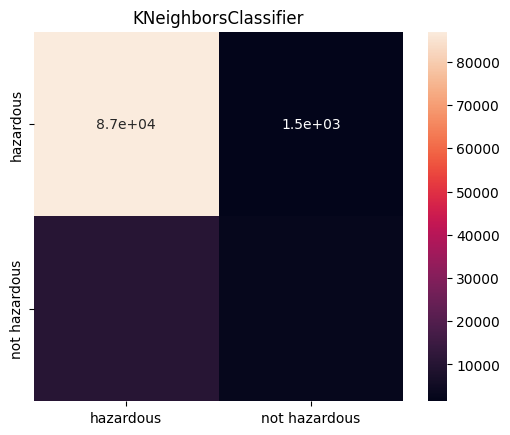

In [69]:
plot_confusion_matrix(y_pred4 , "KNeighborsClassifier")

In [70]:
df_comp = pd.DataFrame({
    'Actual': y_test.ravel(),   # تحويل y_test إلى بعد واحد
    'Predict': y_pred4.ravel()  # تحويل y_pred2 إلى بعد واحد
})
df_comp

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
101455,0,0
101456,0,0
101457,0,0
101458,0,0


<Axes: title={'center': ' Actual & Predict '}>

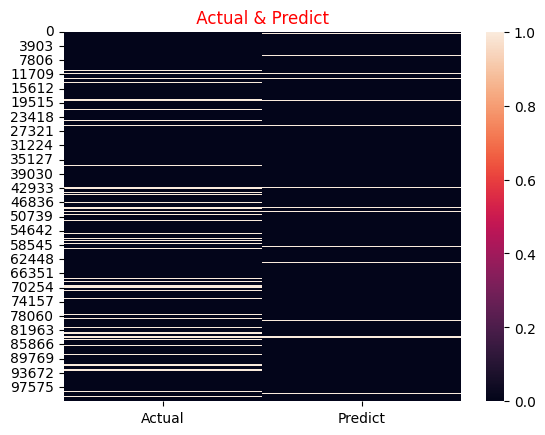

In [71]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(df_comp)

([<matplotlib.patches.Wedge at 0x14c808c9450>,
 [Text(-0.40493702327429076, -1.022754128411006, 'Correct Result'),
  Text(0.40493704721357865, 1.0227541189327707, 'Wrong Result')],
 [Text(-0.22087473996779494, -0.557865888224185, '88%'),
  Text(0.22087475302558832, 0.5578658830542386, '12%')])

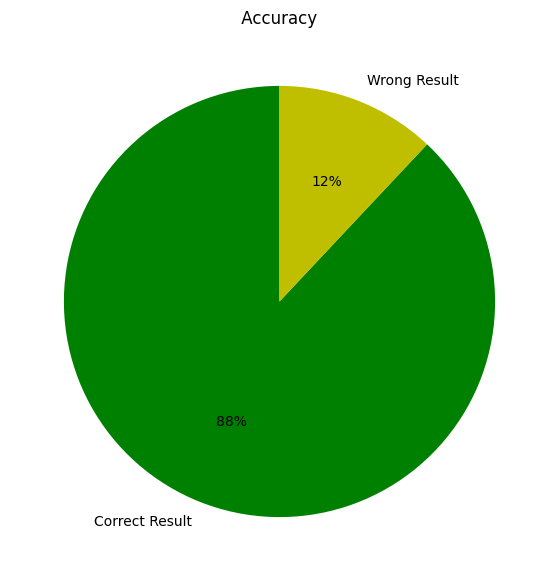

In [72]:
acc = np.round(accuracy_score(y_test, y_pred4)*100)
plt.figure(figsize=(12,7))
data = [acc,100-acc]
names = ['Correct Result','Wrong Result']
plt.title (' Accuracy ',color = 'black')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['g','y'],autopct = '%1.0f%%',)

# XGBoost Classifier

In [73]:
'''xgb_classifier = xgb.XGBClassifier(random_state=42)
parameters = {
    'learning_rate': [0.01, 0.02, 0.03, 0.1],
    'n_estimators': [300, 400, 500],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [0.2, 0.5, 1, 2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'lambda': [0, 0.1, 0.2, 0.3],
    'alpha': [0, 0.1, 0.2, 0.3]
}
xgb_clf = RandomizedSearchCV(xgb_classifier, parameters, scoring='accuracy', n_iter=250)
xgb_clf.fit(X_train_mm,y_train)
xgb_best = xgb_clf.best_params_
print(xgb_clf.best_params_)'''

"xgb_classifier = xgb.XGBClassifier(random_state=42)\nparameters = {\n    'learning_rate': [0.01, 0.02, 0.03, 0.1],\n    'n_estimators': [300, 400, 500],\n    'max_depth': [3, 4, 5, 6],\n    'min_child_weight': [0.2, 0.5, 1, 2],\n    'subsample': [0.8, 0.9, 1.0],\n    'colsample_bytree': [0.8, 0.9, 1.0],\n    'gamma': [0, 0.1, 0.2, 0.3],\n    'lambda': [0, 0.1, 0.2, 0.3],\n    'alpha': [0, 0.1, 0.2, 0.3]\n}\nxgb_clf = RandomizedSearchCV(xgb_classifier, parameters, scoring='accuracy', n_iter=250)\nxgb_clf.fit(X_train_mm,y_train)\nxgb_best = xgb_clf.best_params_\nprint(xgb_clf.best_params_)"

In [74]:
XGBoost_Model = XGBClassifier()
XGBoost_Model.fit(X_train_mm,y_train)
y_pred5 = XGBoost_Model.predict(X_test_mm)
y_pred5

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
get_metrics_results(y_test, y_pred5, verbose = True)

accuracy_score: 0.8908042578356002
roc_auc_score: 0.6237547000817406
precision_score: 0.6936101592420882
recall_score: 0.26469230769230767
f1_score: 0.38316352096208445


[0.8908042578356002,
 0.6237547000817406,
 0.6936101592420882,
 0.26469230769230767,
 0.38316352096208445]

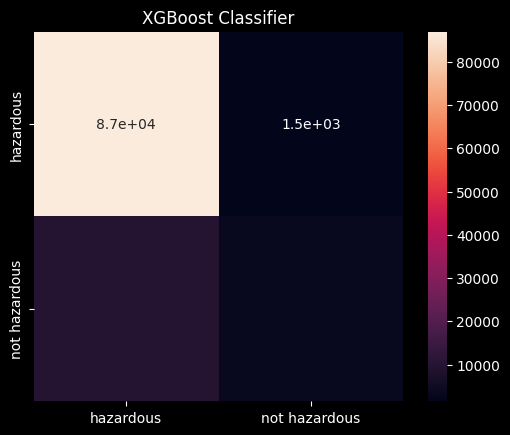

In [76]:
plot_confusion_matrix(y_pred5 , "XGBoost Classifier")

In [77]:
df_comp = pd.DataFrame({
    'Actual': y_test.ravel(),   # تحويل y_test إلى بعد واحد
    'Predict': y_pred5.ravel()  # تحويل y_pred2 إلى بعد واحد
})
df_comp

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
101455,0,0
101456,0,0
101457,0,0
101458,0,0


<Axes: title={'center': ' Actual & Predict '}>

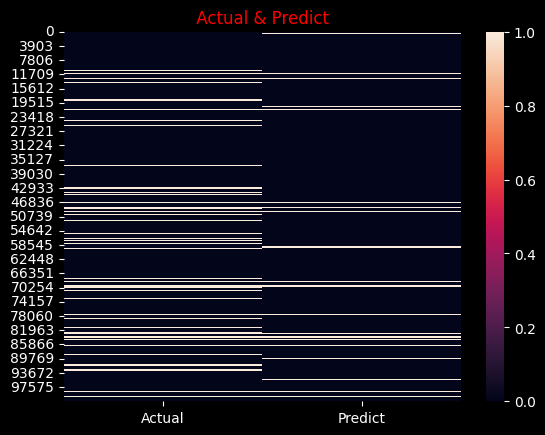

In [78]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(df_comp)

([<matplotlib.patches.Wedge at 0x2aefc4fb410>,
 [Text(-0.37261175878219355, -1.0349688291041623, 'Correct Result'),
  Text(0.37261180723258036, 1.034968811660946, 'Wrong Result')],
 [Text(-0.20324277751756012, -0.5645284522386339, '89%'),
  Text(0.20324280394504382, 0.5645284427241523, '11%')])

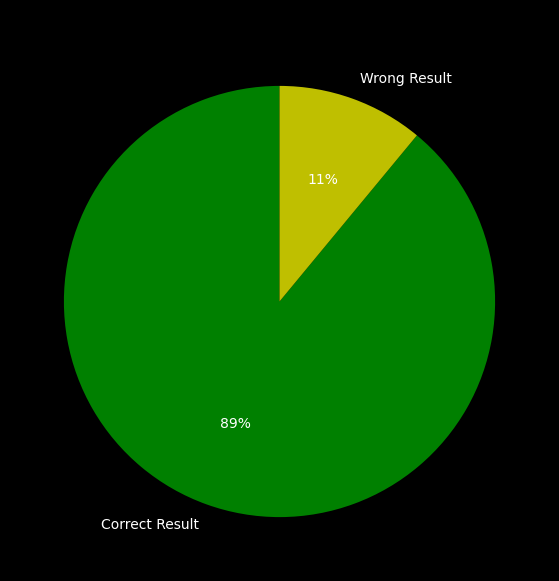

In [79]:
acc = np.round(accuracy_score(y_test, y_pred5)*100)
plt.figure(figsize=(12,7))
data = [acc,100-acc]
names = ['Correct Result','Wrong Result']
plt.title (' Accuracy ',color = 'black')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['g','y'],autopct = '%1.0f%%',)

# CatBoostClassifier

In [80]:
'''catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)
parameters = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'iterations': [50, 100, 200],
    'depth': [3, 4, 5, 6],
    'l2_leaf_reg': [7, 9, 10, 11, 12],
    'border_count': [64, 128, 255],
    'subsample': [0.5, 0.6, 0.7, 1.0],
    'colsample_bylevel': [0.8, 0.9, 1.0],
    'min_data_in_leaf': [2, 4, 6, 10],
    'max_leaves': [15, 31, 63],
    'auto_class_weights': ['None', 'Balanced'],
}
catboost_clf = RandomizedSearchCV(catboost_classifier, parameters, scoring='f1', n_iter=250)
catboost_clf.fit(X_train_mm,y_train)
catboost_best = catboost_clf.best_params_
print(catboost_clf.best_params_)'''

"catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)\nparameters = {\n    'learning_rate': [0.01, 0.1, 0.2, 0.3],\n    'iterations': [50, 100, 200],\n    'depth': [3, 4, 5, 6],\n    'l2_leaf_reg': [7, 9, 10, 11, 12],\n    'border_count': [64, 128, 255],\n    'subsample': [0.5, 0.6, 0.7, 1.0],\n    'colsample_bylevel': [0.8, 0.9, 1.0],\n    'min_data_in_leaf': [2, 4, 6, 10],\n    'max_leaves': [15, 31, 63],\n    'auto_class_weights': ['None', 'Balanced'],\n}\ncatboost_clf = RandomizedSearchCV(catboost_classifier, parameters, scoring='f1', n_iter=250)\ncatboost_clf.fit(X_train_mm,y_train)\ncatboost_best = catboost_clf.best_params_\nprint(catboost_clf.best_params_)"

In [81]:
CatBoostClassifier_Model = CatBoostClassifier()
CatBoostClassifier_Model.fit(X_train_mm,y_train)
y_pred6 = CatBoostClassifier_Model.predict(X_test_mm)
y_pred6

Learning rate set to 0.106352
0:	learn: 0.5192969	total: 199ms	remaining: 3m 18s
1:	learn: 0.4168329	total: 225ms	remaining: 1m 52s
2:	learn: 0.3605838	total: 251ms	remaining: 1m 23s
3:	learn: 0.3109591	total: 284ms	remaining: 1m 10s
4:	learn: 0.2953276	total: 308ms	remaining: 1m 1s
5:	learn: 0.2792822	total: 332ms	remaining: 55s
6:	learn: 0.2667724	total: 356ms	remaining: 50.6s
7:	learn: 0.2624538	total: 381ms	remaining: 47.2s
8:	learn: 0.2560896	total: 405ms	remaining: 44.6s
9:	learn: 0.2530513	total: 432ms	remaining: 42.8s
10:	learn: 0.2503300	total: 459ms	remaining: 41.3s
11:	learn: 0.2482776	total: 484ms	remaining: 39.9s
12:	learn: 0.2473845	total: 507ms	remaining: 38.5s
13:	learn: 0.2456071	total: 531ms	remaining: 37.4s
14:	learn: 0.2444329	total: 556ms	remaining: 36.5s
15:	learn: 0.2433470	total: 581ms	remaining: 35.7s
16:	learn: 0.2425363	total: 608ms	remaining: 35.2s
17:	learn: 0.2421009	total: 634ms	remaining: 34.6s
18:	learn: 0.2413713	total: 669ms	remaining: 34.6s
19:	learn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
get_metrics_results(y_test, y_pred6, verbose = True)

accuracy_score: 0.8889611669623497
roc_auc_score: 0.6153156402720047
precision_score: 0.6845466155810983
recall_score: 0.2473846153846154
f1_score: 0.36343089614645724


[0.8889611669623497,
 0.6153156402720047,
 0.6845466155810983,
 0.2473846153846154,
 0.36343089614645724]

In [83]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     88460
           1       0.68      0.25      0.36     13000

    accuracy                           0.89    101460
   macro avg       0.79      0.62      0.65    101460
weighted avg       0.87      0.89      0.87    101460



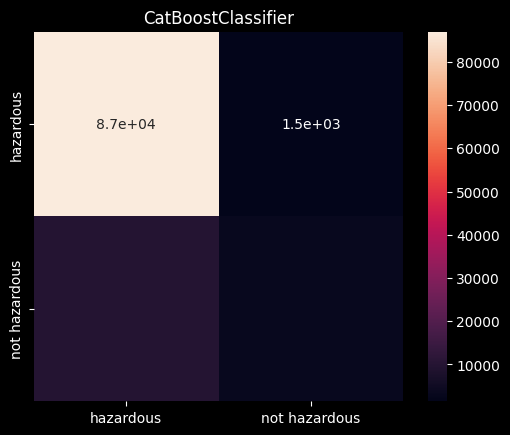

In [84]:
plot_confusion_matrix(y_pred6 , "CatBoostClassifier")

In [85]:
df_comp = pd.DataFrame({
    'Actual': y_test.ravel(),   # تحويل y_test إلى بعد واحد
    'Predict': y_pred6.ravel()  # تحويل y_pred2 إلى بعد واحد
})
df_comp

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
101455,0,0
101456,0,0
101457,0,0
101458,0,0


<Axes: title={'center': ' Actual & Predict '}>

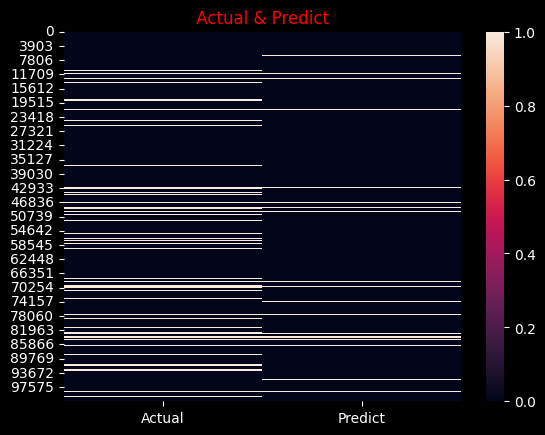

In [86]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(df_comp)

([<matplotlib.patches.Wedge at 0x2ae8d9f3410>,
 [Text(-0.37261175878219355, -1.0349688291041623, 'Correct Result'),
  Text(0.37261180723258036, 1.034968811660946, 'Wrong Result')],
 [Text(-0.20324277751756012, -0.5645284522386339, '89%'),
  Text(0.20324280394504382, 0.5645284427241523, '11%')])

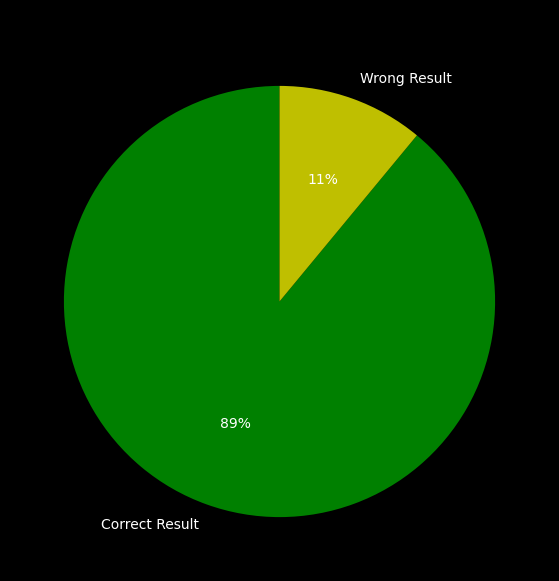

In [87]:
acc = np.round(accuracy_score(y_test, y_pred6)*100)
plt.figure(figsize=(12,7))
data = [acc,100-acc]
names = ['Correct Result','Wrong Result']
plt.title (' Accuracy ',color = 'black')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['g','y'],autopct = '%1.0f%%',)

# AdaBoostClassifier

In [89]:
AdaBoostClassifier_Model = AdaBoostClassifier()
AdaBoostClassifier_Model.fit(X_train_mm,y_train)
y_pred7 = AdaBoostClassifier_Model.predict(X_test_mm)
print(y_pred7)

C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 ... 0 0 0]


In [90]:
get_metrics_results(y_test, y_pred7, verbose = True)

accuracy_score: 0.8832939089296274
roc_auc_score: 0.5778127097862572
precision_score: 0.6819466248037677
recall_score: 0.16707692307692307
f1_score: 0.26839666357738645


[0.8832939089296274,
 0.5778127097862572,
 0.6819466248037677,
 0.16707692307692307,
 0.26839666357738645]

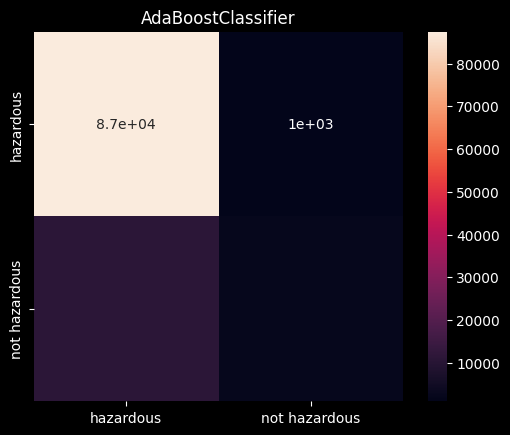

In [132]:
plot_confusion_matrix(y_pred7 , "AdaBoostClassifier")

In [92]:
df_comp = pd.DataFrame({
    'Actual': y_test.ravel(),   # تحويل y_test إلى بعد واحد
    'Predict': y_pred7.ravel()  # تحويل y_pred2 إلى بعد واحد
})
df_comp

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
101455,0,0
101456,0,0
101457,0,0
101458,0,0


<Axes: title={'center': ' Actual & Predict '}>

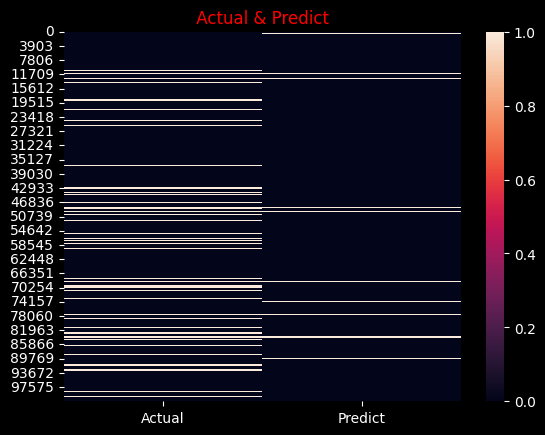

In [93]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(df_comp)

([<matplotlib.patches.Wedge at 0x2ae92d320d0>,
 [Text(-0.40493702327429076, -1.022754128411006, 'Correct Result'),
  Text(0.40493704721357865, 1.0227541189327707, 'Wrong Result')],
 [Text(-0.22087473996779494, -0.557865888224185, '88%'),
  Text(0.22087475302558832, 0.5578658830542386, '12%')])

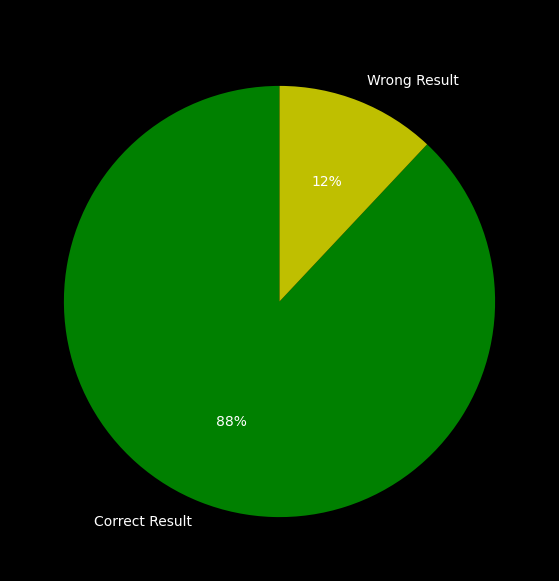

In [122]:
acc = np.round(accuracy_score(y_test, y_pred7)*100)
plt.figure(figsize=(12,7))
data = [acc,100-acc]
names = ['Correct Result','Wrong Result']
plt.title (' Accuracy ',color = 'black')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['g','y'],autopct = '%1.0f%%',)

# Gradient Boosting Classifier

In [121]:
gb = GradientBoostingClassifier()
gb.fit(X_train_mm,y_train)
y_pred8 = gb.predict(X_test_mm)
y_pred8

C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [130]:
get_metrics_results(y_test, y_pred8, verbose = True)

accuracy_score: 0.885846639069584
roc_auc_score: 0.5797687872832571
precision_score: 0.739851150202977
recall_score: 0.16823076923076924
f1_score: 0.27412885434946105


[0.885846639069584,
 0.5797687872832571,
 0.739851150202977,
 0.16823076923076924,
 0.27412885434946105]

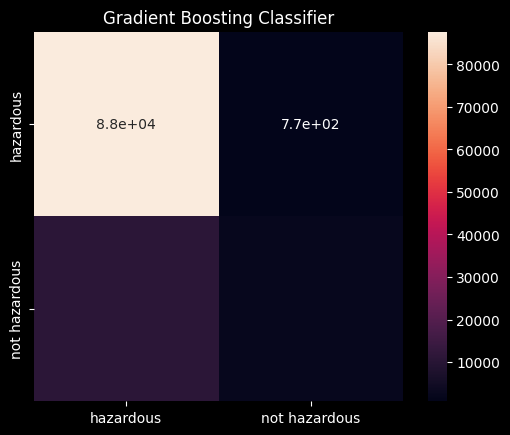

In [131]:
plot_confusion_matrix(y_pred8 , "Gradient Boosting Classifier")

In [135]:
df_comp = pd.DataFrame({
    'Actual': y_test.ravel(),   # تحويل y_test إلى بعد واحد
    'Predict': y_pred8.ravel()  # تحويل y_pred2 إلى بعد واحد
})
df_comp

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
101455,0,0
101456,0,0
101457,0,0
101458,0,0


<Axes: title={'center': ' Actual & Predict '}>

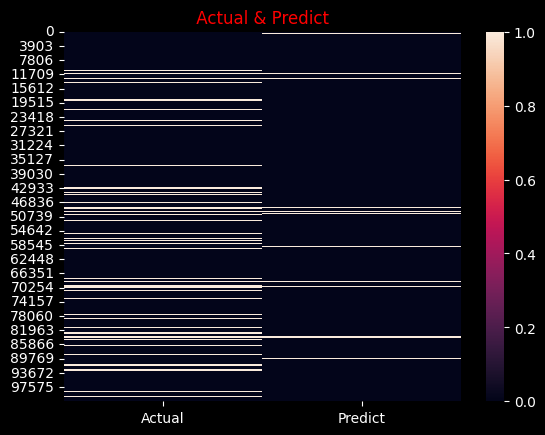

In [136]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(df_comp)

([<matplotlib.patches.Wedge at 0x2af28016e90>,
 [Text(-0.37261175878219355, -1.0349688291041623, 'Correct Result'),
  Text(0.37261180723258036, 1.034968811660946, 'Wrong Result')],
 [Text(-0.20324277751756012, -0.5645284522386339, '89%'),
  Text(0.20324280394504382, 0.5645284427241523, '11%')])

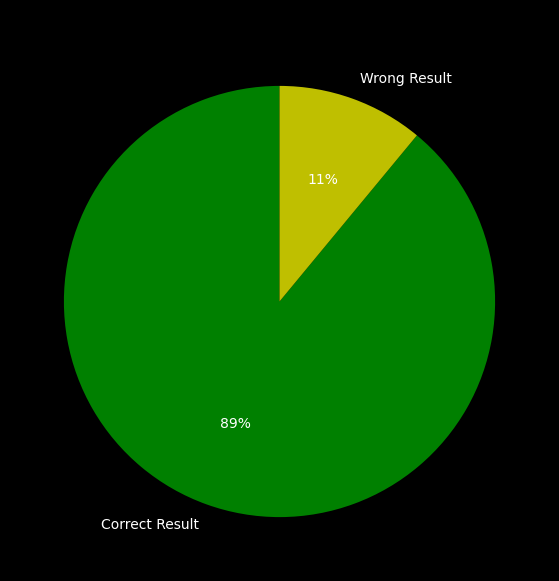

In [137]:
acc = np.round(accuracy_score(y_test, y_pred8)*100)
plt.figure(figsize=(12,7))
data = [acc,100-acc]
names = ['Correct Result','Wrong Result']
plt.title (' Accuracy ',color = 'black')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['g','y'],autopct = '%1.0f%%',)

# Neural Network

In [128]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu',
                          input_shape=(X_train_mm.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer 1
    tf.keras.layers.Dense(16, activation='relu'), # Hidden layer 2
    tf.keras.layers.Dense(8, activation='relu'), # Hidden layer 3

    tf.keras.layers.Dense(1, activation='sigmoid') # Output layer
    ])

C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8783 - loss: 0.2897 - val_accuracy: 0.8821 - val_loss: 0.2525
Epoch 2/20
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8823 - loss: 0.2495 - val_accuracy: 0.8841 - val_loss: 0.2423
Epoch 3/20
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8832 - loss: 0.2452 - val_accuracy: 0.8825 - val_loss: 0.2522
Epoch 4/20
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8833 - loss: 0.2455 - val_accuracy: 0.8840 - val_loss: 0.2426
Epoch 5/20
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8837 - loss: 0.2450 - val_accuracy: 0.8840 - val_loss: 0.2407
Epoch 6/20
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8847 - loss: 0.2428 - val_accuracy: 0.8835 - val_loss: 0.2444
Epoch 7/20
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8843 - loss: 0.2427 - val_accuracy: 0.8824 - val_loss: 0.2461
Epoch 8/20
7399/7399 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8834 - loss: 0

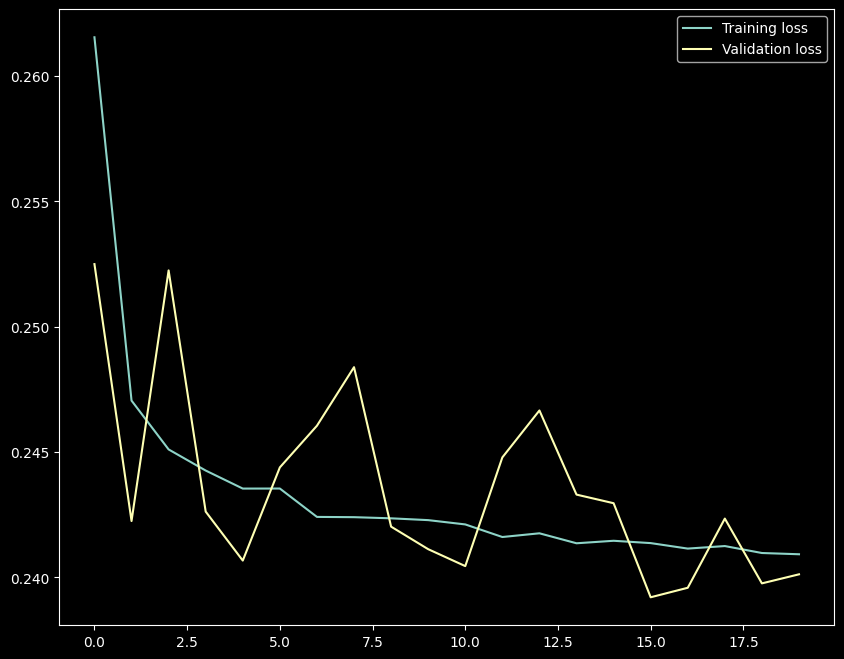

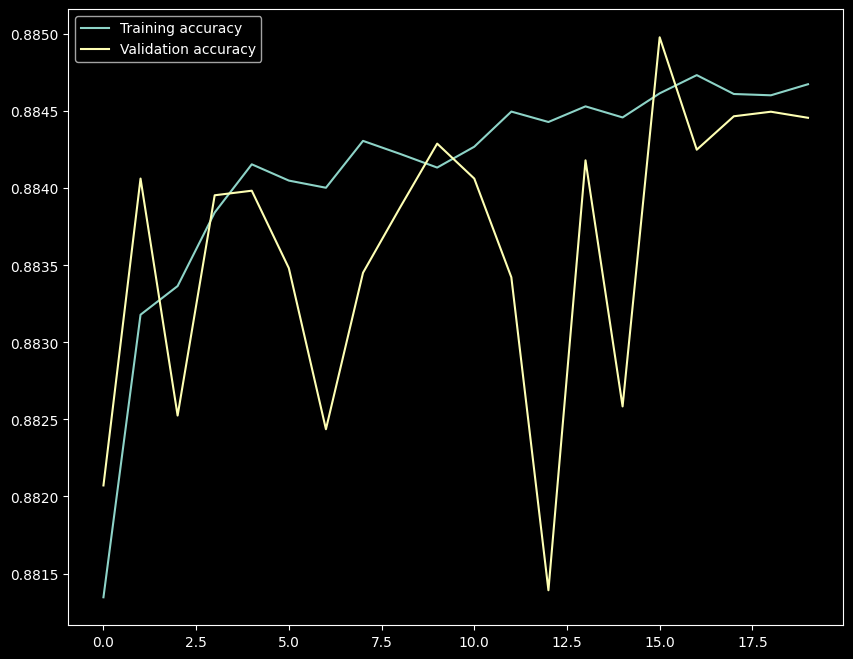

In [129]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=15)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_mm,y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test_mm, y_test),callbacks=[early_stop])
# plot the training and testing loss and accuracy at each epoc
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Validation loss')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['accuracy'], label='Training accuracy')
ax.plot(history.history['val_accuracy'], label='Validation accuracy')
ax.legend()
plt.show()

# Evaluation

In [144]:
def evaluate_model(model, X_train, y_train, X_test, y_test, batch_size=10000):
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    # توقع البيانات على دفعات صغيرة لتجنب استهلاك الذاكرة الكبير
    y_pred = []
    for i in range(0, len(X_test), batch_size):
        batch = X_test[i:i+batch_size]
        y_pred_batch = model.predict(batch)
        y_pred.extend(y_pred_batch)
    
    return train_acc, test_acc, y_pred

# تقسيم البيانات لأخذ عينة أصغر منها لتقليل استهلاك الذاكرة
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_mm, y_train, test_size=0.9, random_state=42)
X_test_sample, _, y_test_sample, _ = train_test_split(X_test_mm, y_test, test_size=0.9, random_state=42)

models = [
    LogisticRegression(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    XGBClassifier(),
    CatBoostClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

model_names = ["Logistic Regression", "Random Forest", "KNeighbors Classifier", "XGBoost", "CatBoost", "AdaBoost", "Gradient Boosting"]

train_results = []
test_results = []

for model in models:
    train_acc, test_acc, y_pred = evaluate_model(model, X_train_sample, y_train_sample, X_test_sample, y_test_sample)
    train_results.append(train_acc)
    test_results.append(test_acc)

# يمكنك طباعة النتائج أو معالجتها كما تريد
print("Training accuracies:", train_results)
print("Testing accuracies:", test_results)


C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mahmoud Ragab\AppData\Local\Temp\ipykernel_2100\1215540772.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Learning rate set to 0.039787
0:	learn: 0.6040890	total: 7.83ms	remaining: 7.82s
1:	learn: 0.5477476	total: 15.8ms	remaining: 7.91s
2:	learn: 0.4967001	total: 23.3ms	remaining: 7.75s
3:	learn: 0.4553776	total: 30.8ms	remaining: 7.67s
4:	learn: 0.4216300	total: 38.6ms	remaining: 7.67s
5:	learn: 0.3889590	total: 46.2ms	remaining: 7.66s
6:	learn: 0.3630455	total: 54ms	remaining: 7.65s
7:	learn: 0.3438873	total: 61.7ms	remaining: 7.65s
8:	learn: 0.3279514	total: 69ms	remaining: 7.6s
9:	learn: 0.3162186	total: 76.8ms	remaining: 7.61s
10:	learn: 0.3062021	total: 84.5ms	remaining: 7.59s
11:	learn: 0.2972730	total: 92.8ms	remaining: 7.64s
12:	learn: 0.2895991	total: 101ms	remaining: 7.64s
13:	learn: 0.2837850	total: 108ms	remaining: 7.62s
14:	learn: 0.2784525	total: 116ms	remaining: 7.64s
15:	learn: 0.2735462	total: 124ms	remaining: 7.63s
16:	learn: 0.2697936	total: 131ms	remaining: 7.6s
17:	learn: 0.2671040	total: 139ms	remaining: 7.6s
18:	learn: 0.2645463	total: 147ms	remaining: 7.59s
19:	le

C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracies: [0.8636421239386644, 1.0, 0.9068559117982512, 0.9244286740168124, 0.8337813768796075, 0.8845097790732057, 0.8867486165673975]
Testing accuracies: [0.8639858072146659, 0.8842893751232013, 0.8668440764833432, 0.8816282278730534, 0.8390471324458296, 0.8840922531046718, 0.8859649122807017]


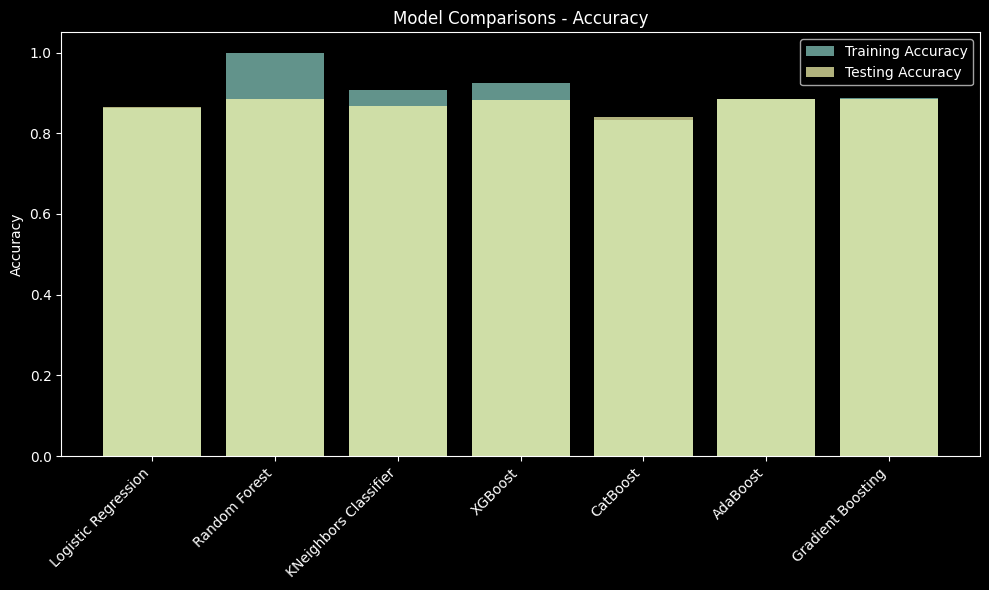

In [145]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, train_results, alpha=0.7, label="Training Accuracy")
plt.bar(model_names, test_results, alpha=0.7, label="Testing Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.title("Model Comparisons - Accuracy")
plt.tight_layout()
plt.show()

# Model Deployment

In [219]:
pickle.dump(RFC, open('NEO-AI.pkl', 'wb'))
pickled_model = pickle.load(open('NEO-AI.pkl', 'rb'))
random_row = InputsData_for_Testing.sample(n=1)
random_row

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
25544,0.451295,0.006354,0.006354,0.096236,0.560806


In [220]:
prediction = pickled_model.predict(random_row)
prediction

C:\Users\Mahmoud Ragab\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0], dtype=int64)

In [221]:
converter = pyttsx3.init()
converter.setProperty('rate', 120)
converter.setProperty('volume', 1)
if prediction == 1:
    converter.say("Hello Mahmoud Ragab, Be careful. this Object must be dealt with urgently, this Object has become a serious threat to our planet")
elif prediction == 0:
    converter.say("Hello Mahmoud Ragab, Rest assured dear, this Object is simple and, according to my analysis, does not pose a threat to the planet..")
converter.say("For your safety, I am just a machine learning model, but I am here to help you. You can report it to the nearest space science center for more peace of mind. Thank you for using “NEO-AI” for space sciences.")
converter.runAndWait()